In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.formula.api as smf
import geopandas as gpd
from pysal.contrib.viz import mapping as maps
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
from shapely.geometry import *
import pysal as ps


### Let's look it up NTA DATA

In [2]:
PNC = pd.read_csv('/home/cusp/sk6176/GIS_Project/ACS_nybb//2010CensusTract_PUMA_NTA.csv')

In [3]:
PNC.head()

Borough  2010CensusTract  PUMA NTA_Code                 NTA_Name
0   Bronx            31000  3704     BX31  Allerton-Pelham Gardens
1   Bronx            31200  3704     BX31  Allerton-Pelham Gardens
2   Bronx            31400  3704     BX31  Allerton-Pelham Gardens
3   Bronx            31600  3704     BX31  Allerton-Pelham Gardens
4   Bronx            31800  3704     BX31  Allerton-Pelham Gardens

In [4]:
PNC.shape

(2168, 5)

In [5]:
nynta = gpd.read_file('/home/cusp/sk6176/GIS_Project/nynta/nynta_17d/nynta.shp')

In [6]:
nynta.shape

(195, 8)

In [7]:
nynta.head()

BoroCode  BoroName CountyFIPS NTACode        NTAName    Shape_Leng  \
0         3  Brooklyn        047    BK88   Borough Park  39247.228028   
1         4    Queens        081    QN52  East Flushing  25843.364936   
2         4    Queens        081    QN48     Auburndale  32446.878673   
3         4    Queens        081    QN51    Murray Hill  33266.904811   
4         4    Queens        081    QN27  East Elmhurst  19816.712323   

     Shape_Area                                           geometry  
0  5.400502e+07  POLYGON ((990897.9000244141 169268.1207885742,...  
1  2.945438e+07  POLYGON ((1041061.948242188 215429.4609985352,...  
2  3.416422e+07  POLYGON ((1046392.971191406 210169.7536010742,...  
3  5.248828e+07  POLYGON ((1038593.459228516 221913.3550415039,...  
4  1.972685e+07  POLYGON ((1022728.275024414 217530.8082275391,...

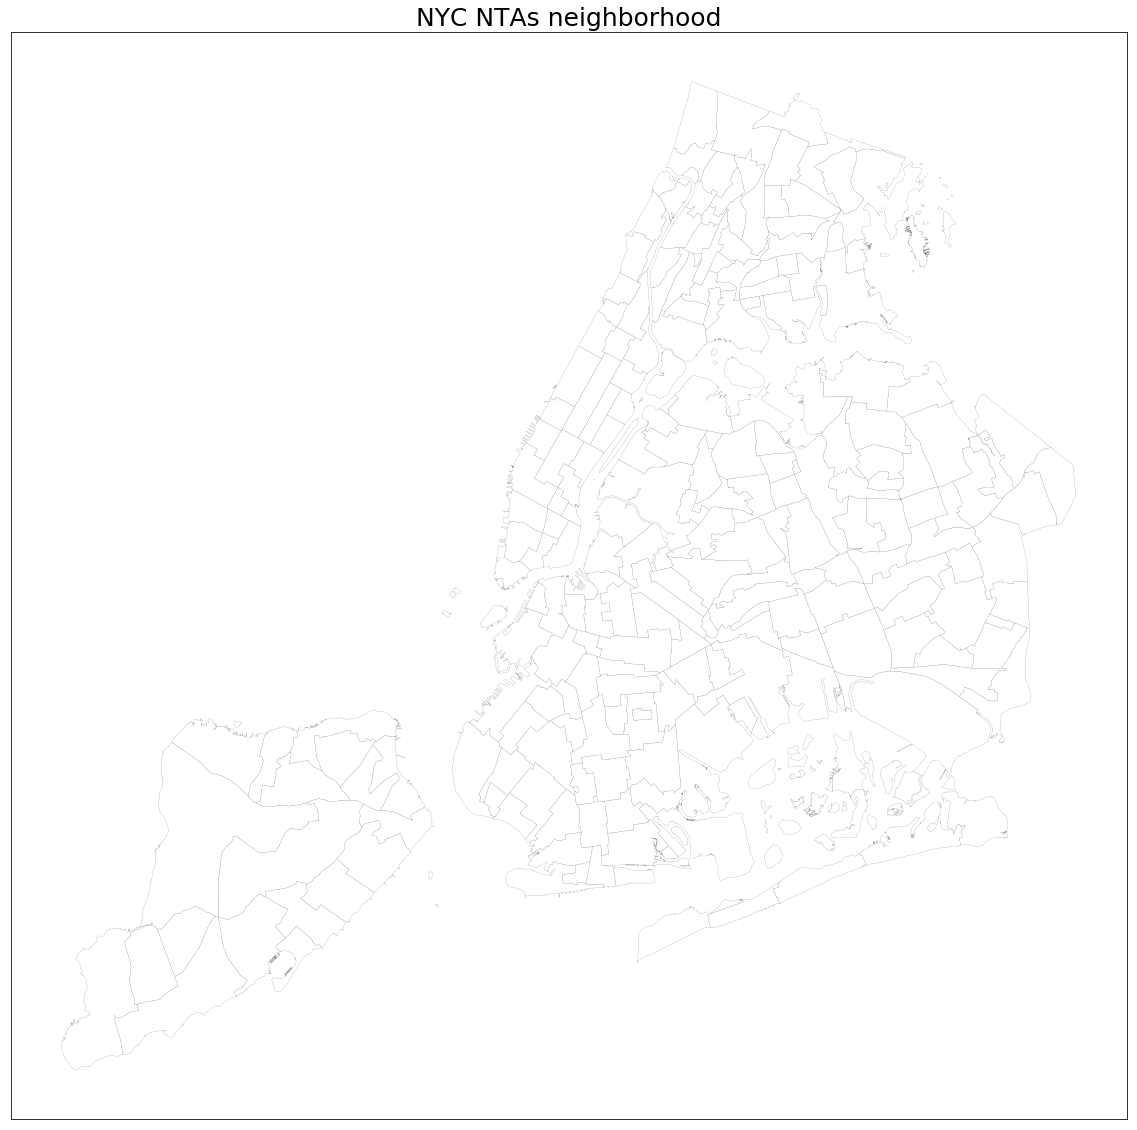

In [200]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
nynta.plot(color='white', edgecolor='black', linewidth = 0.1 ,ax =ax)

plt.title('NYC NTAs neighborhood', fontsize = 25)

In [9]:
df =pd.read_csv('/home/cusp/sk6176/GIS_Project/ACS_nybb/ACS_16_5YR_S1903_with_ann.csv', skiprows=1)

In [10]:
df.columns

Index([u'Id', u'Id2', u'Geography', u'Total; Estimate; Households',
       u'Total; Margin of Error; Households',
       u'Median income (dollars); Estimate; Households',
       u'Median income (dollars); Margin of Error; Households',
       u'Total; Estimate; Households - One race-- - White',
       u'Total; Margin of Error; Households - One race-- - White',
       u'Median income (dollars); Estimate; Households - One race-- - White',
       ...
       u'Median income (dollars); Estimate; PERCENT ALLOCATED - Household income in the past 12 months',
       u'Median income (dollars); Margin of Error; PERCENT ALLOCATED - Household income in the past 12 months',
       u'Total; Estimate; PERCENT ALLOCATED - Family income in the past 12 months',
       u'Total; Margin of Error; PERCENT ALLOCATED - Family income in the past 12 months',
       u'Median income (dollars); Estimate; PERCENT ALLOCATED - Family income in the past 12 months',
       u'Median income (dollars); Margin of Error; PERC

In [11]:
df = df.iloc[:,[1,2,3,5]]

In [12]:
df.head()

Id2                                   Geography  \
0  36001000100     Census Tract 1, Albany County, New York   
1  36001000200     Census Tract 2, Albany County, New York   
2  36001000300     Census Tract 3, Albany County, New York   
3  36001000401  Census Tract 4.01, Albany County, New York   
4  36001000403  Census Tract 4.03, Albany County, New York   

   Total; Estimate; Households Median income (dollars); Estimate; Households  
0                          843                                         30893  
1                         2049                                         30208  
2                         2324                                         30068  
3                         1016                                         74130  
4                         2294                                         59079

In [13]:
df.rename(columns = {'Id2' : 'census_tract',
                     'Total; Estimate; Households':'TH',
                     'Median income (dollars); Estimate; Households' : 'Median_Income'}, inplace = True)


In [14]:
df.head()

census_tract                                   Geography    TH  \
0   36001000100     Census Tract 1, Albany County, New York   843   
1   36001000200     Census Tract 2, Albany County, New York  2049   
2   36001000300     Census Tract 3, Albany County, New York  2324   
3   36001000401  Census Tract 4.01, Albany County, New York  1016   
4   36001000403  Census Tract 4.03, Albany County, New York  2294   

  Median_Income  
0         30893  
1         30208  
2         30068  
3         74130  
4         59079

In [15]:
df.shape

(4918, 4)

In [16]:
df_conv4 = pd.DataFrame([['Bronx', '36005'],['Brooklyn','36047'],['Manhattan','36061'], 
              ['Queens','36081'], ['Staten Island', '36085']], columns=['Borough','BroCode'])
df_conv4

Borough BroCode
0          Bronx   36005
1       Brooklyn   36047
2      Manhattan   36061
3         Queens   36081
4  Staten Island   36085

In [17]:
PNC.head()

Borough  2010CensusTract  PUMA NTA_Code                 NTA_Name
0   Bronx            31000  3704     BX31  Allerton-Pelham Gardens
1   Bronx            31200  3704     BX31  Allerton-Pelham Gardens
2   Bronx            31400  3704     BX31  Allerton-Pelham Gardens
3   Bronx            31600  3704     BX31  Allerton-Pelham Gardens
4   Bronx            31800  3704     BX31  Allerton-Pelham Gardens

In [18]:
PNC = PNC.merge(df_conv4, on ='Borough')

In [19]:
PNC['census_tract']  = (PNC.BroCode +\
                        PNC['2010CensusTract'].apply(lambda x : str(x).zfill(6))).astype(int)

In [20]:
PNC.head()

Borough  2010CensusTract  PUMA NTA_Code                 NTA_Name BroCode  \
0   Bronx            31000  3704     BX31  Allerton-Pelham Gardens   36005   
1   Bronx            31200  3704     BX31  Allerton-Pelham Gardens   36005   
2   Bronx            31400  3704     BX31  Allerton-Pelham Gardens   36005   
3   Bronx            31600  3704     BX31  Allerton-Pelham Gardens   36005   
4   Bronx            31800  3704     BX31  Allerton-Pelham Gardens   36005   

   census_tract  
0   36005031000  
1   36005031200  
2   36005031400  
3   36005031600  
4   36005031800

In [21]:
PNC = PNC.merge(df, left_on = 'census_tract', right_on = 'census_tract')

In [22]:
PNC.head()

Borough  2010CensusTract  PUMA NTA_Code                 NTA_Name BroCode  \
0   Bronx            31000  3704     BX31  Allerton-Pelham Gardens   36005   
1   Bronx            31200  3704     BX31  Allerton-Pelham Gardens   36005   
2   Bronx            31400  3704     BX31  Allerton-Pelham Gardens   36005   
3   Bronx            31600  3704     BX31  Allerton-Pelham Gardens   36005   
4   Bronx            31800  3704     BX31  Allerton-Pelham Gardens   36005   

   census_tract                                 Geography    TH Median_Income  
0   36005031000  Census Tract 310, Bronx County, New York  1241         81709  
1   36005031200  Census Tract 312, Bronx County, New York   584         68276  
2   36005031400  Census Tract 314, Bronx County, New York   648         82778  
3   36005031600  Census Tract 316, Bronx County, New York   598         62692  
4   36005031800  Census Tract 318, Bronx County, New York   562         62391

In [23]:
PNC.head()

Borough  2010CensusTract  PUMA NTA_Code                 NTA_Name BroCode  \
0   Bronx            31000  3704     BX31  Allerton-Pelham Gardens   36005   
1   Bronx            31200  3704     BX31  Allerton-Pelham Gardens   36005   
2   Bronx            31400  3704     BX31  Allerton-Pelham Gardens   36005   
3   Bronx            31600  3704     BX31  Allerton-Pelham Gardens   36005   
4   Bronx            31800  3704     BX31  Allerton-Pelham Gardens   36005   

   census_tract                                 Geography    TH Median_Income  
0   36005031000  Census Tract 310, Bronx County, New York  1241         81709  
1   36005031200  Census Tract 312, Bronx County, New York   584         68276  
2   36005031400  Census Tract 314, Bronx County, New York   648         82778  
3   36005031600  Census Tract 316, Bronx County, New York   598         62692  
4   36005031800  Census Tract 318, Bronx County, New York   562         62391

In [24]:
PNC.Median_Income = pd.to_numeric(PNC.Median_Income,  errors='coerce')

In [25]:
PNC.shape

(2167, 10)

In [26]:
PNC = PNC.dropna()

In [27]:
PNC.shape

(2102, 10)

In [28]:
PNC = PNC.groupby('NTA_Code').mean()

In [29]:
PNC.head()

2010CensusTract    PUMA  census_tract           TH  Median_Income
NTA_Code                                                                   
BK09           500.666667  4004.0  3.604700e+10  1858.666667  113792.333333
BK17         60326.473684  4016.0  3.604706e+10  1378.842105   60167.473684
BK19         44579.111111  4018.0  3.604704e+10  1566.333333   36897.111111
BK21         33775.000000  4018.0  3.604703e+10  1372.625000   35069.875000
BK23         35400.750000  4018.0  3.604704e+10  2033.000000   41263.500000

In [30]:
PNC.reset_index(level = 0 , inplace = True)

In [31]:
PNC.head()

NTA_Code  2010CensusTract    PUMA  census_tract           TH  Median_Income
0     BK09       500.666667  4004.0  3.604700e+10  1858.666667  113792.333333
1     BK17     60326.473684  4016.0  3.604706e+10  1378.842105   60167.473684
2     BK19     44579.111111  4018.0  3.604704e+10  1566.333333   36897.111111
3     BK21     33775.000000  4018.0  3.604703e+10  1372.625000   35069.875000
4     BK23     35400.750000  4018.0  3.604704e+10  2033.000000   41263.500000

In [32]:
TH = PNC.groupby('NTA_Code').sum()

In [33]:
PNC['TH'] = TH.values

In [34]:
PNC.head()

NTA_Code  2010CensusTract    PUMA  census_tract            TH  Median_Income
0     BK09       500.666667  4004.0  3.604700e+10    500.666667  113792.333333
1     BK17     60326.473684  4016.0  3.604706e+10  60326.473684   60167.473684
2     BK19     44579.111111  4018.0  3.604704e+10  44579.111111   36897.111111
3     BK21     33775.000000  4018.0  3.604703e+10  33775.000000   35069.875000
4     BK23     35400.750000  4018.0  3.604704e+10  35400.750000   41263.500000

In [35]:
nynta.shape

(195, 8)

In [36]:
PNC.shape

(191, 6)

In [37]:
nynta.head()

BoroCode  BoroName CountyFIPS NTACode        NTAName    Shape_Leng  \
0         3  Brooklyn        047    BK88   Borough Park  39247.228028   
1         4    Queens        081    QN52  East Flushing  25843.364936   
2         4    Queens        081    QN48     Auburndale  32446.878673   
3         4    Queens        081    QN51    Murray Hill  33266.904811   
4         4    Queens        081    QN27  East Elmhurst  19816.712323   

     Shape_Area                                           geometry  
0  5.400502e+07  POLYGON ((990897.9000244141 169268.1207885742,...  
1  2.945438e+07  POLYGON ((1041061.948242188 215429.4609985352,...  
2  3.416422e+07  POLYGON ((1046392.971191406 210169.7536010742,...  
3  5.248828e+07  POLYGON ((1038593.459228516 221913.3550415039,...  
4  1.972685e+07  POLYGON ((1022728.275024414 217530.8082275391,...

In [38]:
PNC.head()

NTA_Code  2010CensusTract    PUMA  census_tract            TH  Median_Income
0     BK09       500.666667  4004.0  3.604700e+10    500.666667  113792.333333
1     BK17     60326.473684  4016.0  3.604706e+10  60326.473684   60167.473684
2     BK19     44579.111111  4018.0  3.604704e+10  44579.111111   36897.111111
3     BK21     33775.000000  4018.0  3.604703e+10  33775.000000   35069.875000
4     BK23     35400.750000  4018.0  3.604704e+10  35400.750000   41263.500000

In [39]:
NYN_merged = nynta.merge(PNC, left_on = 'NTACode' ,right_on = 'NTA_Code')

In [40]:
NYN_merged.head()

BoroCode  BoroName CountyFIPS NTACode        NTAName    Shape_Leng  \
0         3  Brooklyn        047    BK88   Borough Park  39247.228028   
1         4    Queens        081    QN52  East Flushing  25843.364936   
2         4    Queens        081    QN48     Auburndale  32446.878673   
3         4    Queens        081    QN51    Murray Hill  33266.904811   
4         4    Queens        081    QN27  East Elmhurst  19816.712323   

     Shape_Area                                           geometry NTA_Code  \
0  5.400502e+07  POLYGON ((990897.9000244141 169268.1207885742,...     BK88   
1  2.945438e+07  POLYGON ((1041061.948242188 215429.4609985352,...     QN52   
2  3.416422e+07  POLYGON ((1046392.971191406 210169.7536010742,...     QN48   
3  5.248828e+07  POLYGON ((1038593.459228516 221913.3550415039,...     QN51   
4  1.972685e+07  POLYGON ((1022728.275024414 217530.8082275391,...     QN27   

   2010CensusTract    PUMA  census_tract             TH  Median_Income  
0     28857.142857  4014.0  3.604703e+10   28857.142857   39765.750000  
1    116800.000000  4103.0  3.608112e+10  116800.000000   53511.666667  
2    135500.428571  4104.0  3.608114e+10  135500.428571   78223.857143  
3    111961.538462  4103.0  3.608111e+10  111961.538462   60080.000000  
4     36375.000000  4102.0  3.608104e+10   36375.000000   49822.375000

In [41]:
NYN_merged.shape

(191, 14)

#### Neighborhood level table into GEOPanda frame

In [42]:
# crs = {'init': 'epsg:4326'}
# geometry = NYN_grouped.geometry
# NYN_grouped_shp = gpd.GeoDataFrame(NYN_grouped, crs=crs, geometry=geometry)

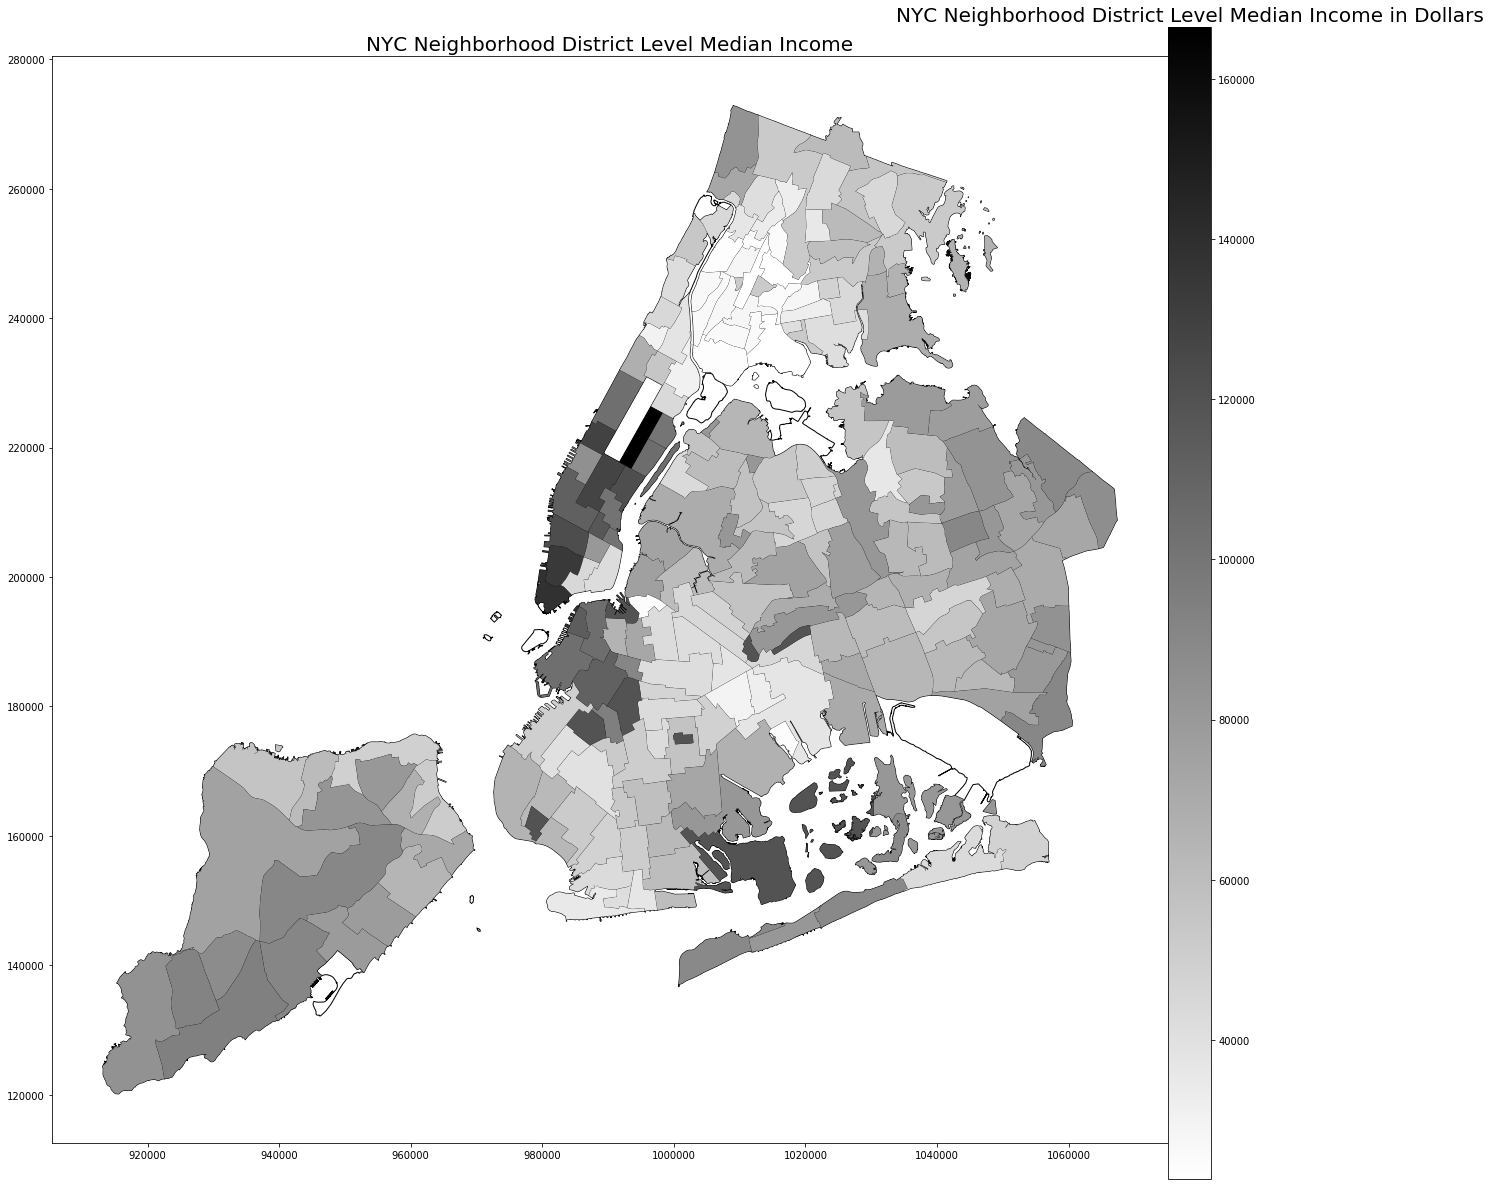

In [43]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
vmin, vmax = min(NYN_merged['Median_Income']) , max(NYN_merged['Median_Income'])

base = nynta.plot( color = 'white', edgecolor='black' ,ax = ax)
NYN_merged.plot(column = 'Median_Income', cmap = 'binary', edgecolor='black', linewidth = 0.1 ,ax =ax)

plt.title('NYC Neighborhood District Level Median Income', fontsize = 20)


# adding heat map
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='binary', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable...
sm._A = []
fig.colorbar(sm, cax=cax)

plt.title('NYC Neighborhood District Level Median Income in Dollars', fontsize = 20)

### Let's look up histogram of Mean_Income

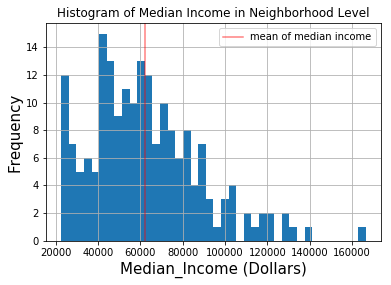

In [44]:
NYN_merged['Median_Income'].hist( bins = 40)
plt.axvline(NYN_merged.Median_Income.mean(), 0, 15, color = 'red', alpha = 0.5, label = 'mean of median income')
plt.xlabel('Median_Income (Dollars)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Histogram of Median Income in Neighborhood Level', fontsize = 12)
plt.legend()


#### It shows there are a lot of poverty level exists in NYC and actually, above mean of median income is quickly drop

#### I would like to standardized the median income and would like to compare the original map and standardized map

In [45]:
Mmean = NYN_merged['Median_Income'].mean()
Mstd = NYN_merged['Median_Income'].std()
NYN_merged['Median_Income_std'] = (NYN_merged['Median_Income'] - Mmean) / Mstd 

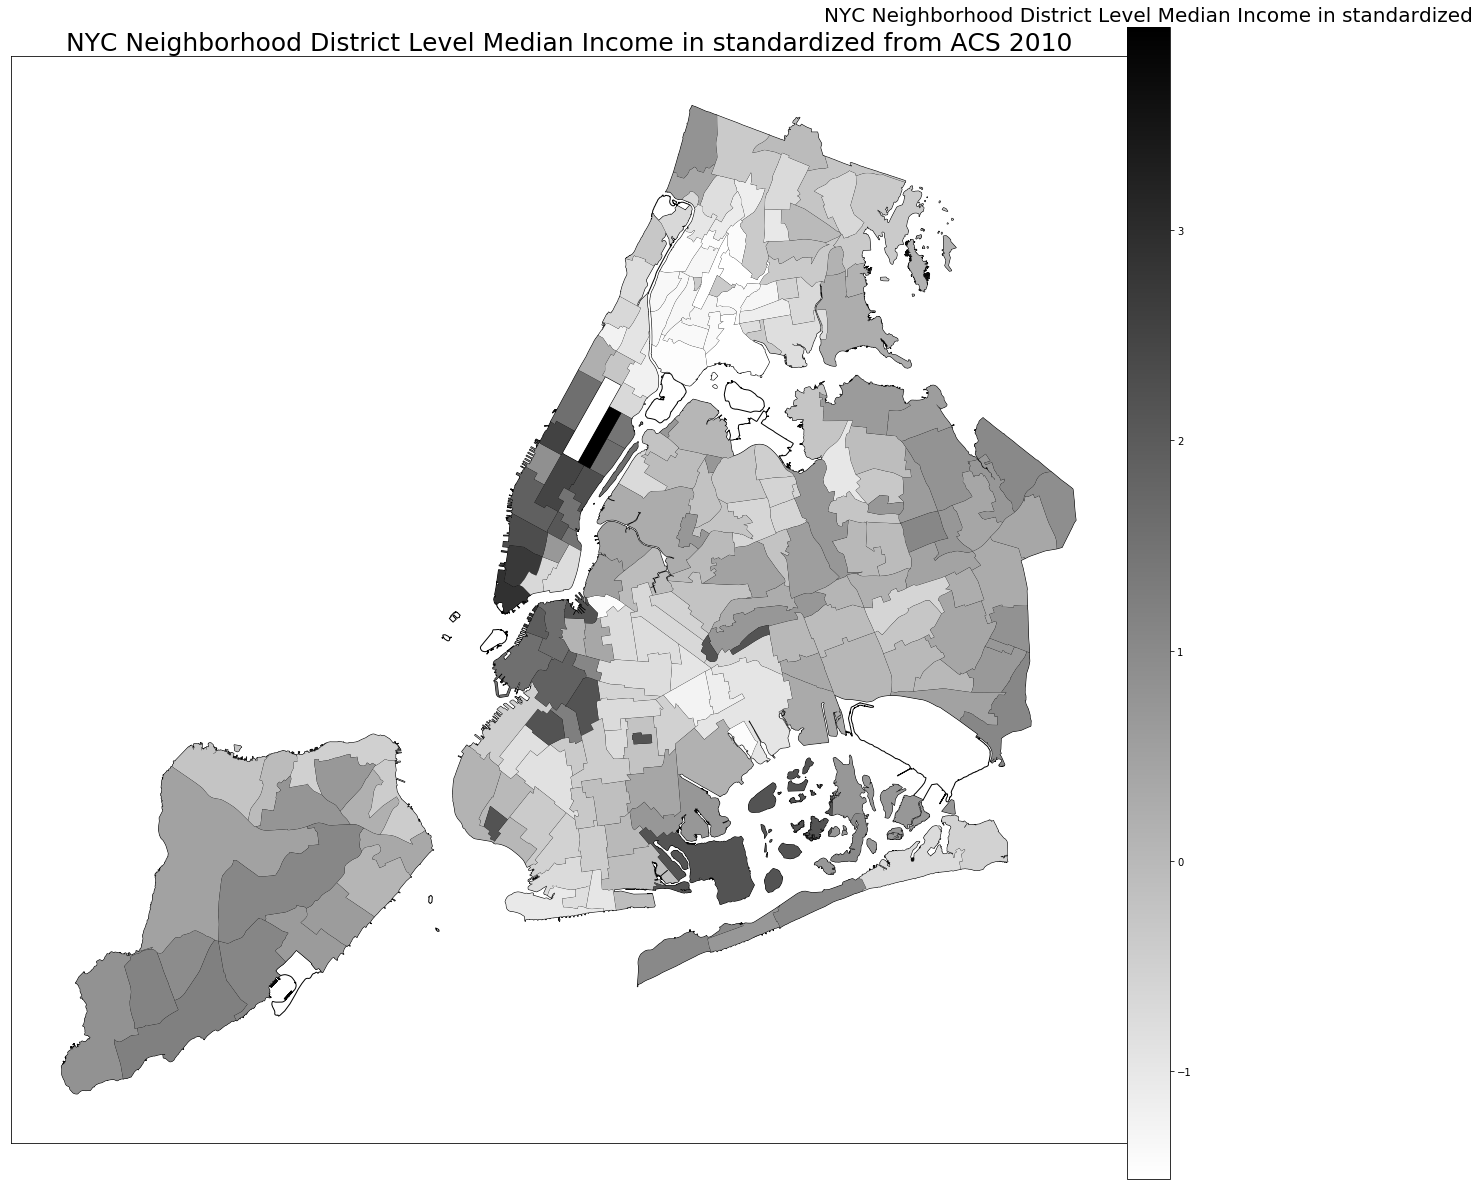

In [209]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
vmin, vmax = min(NYN_merged['Median_Income_std']) , max(NYN_merged['Median_Income_std'])

base = nynta.plot( color = 'white', edgecolor='black' ,ax = ax)
NYN_merged.plot(column = 'Median_Income_std', cmap='binary',vmin = vmin, 
                vmax = vmax ,edgecolor='black', linewidth = 0.1 ,ax =ax)
plt.title('NYC Neighborhood District Level Median Income in standardized from ACS 2010', fontsize = 25)
# adding heat map
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='binary', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable...
sm._A = []
fig.colorbar(sm, cax=cax)

plt.title('NYC Neighborhood District Level Median Income in standardized', fontsize = 20)

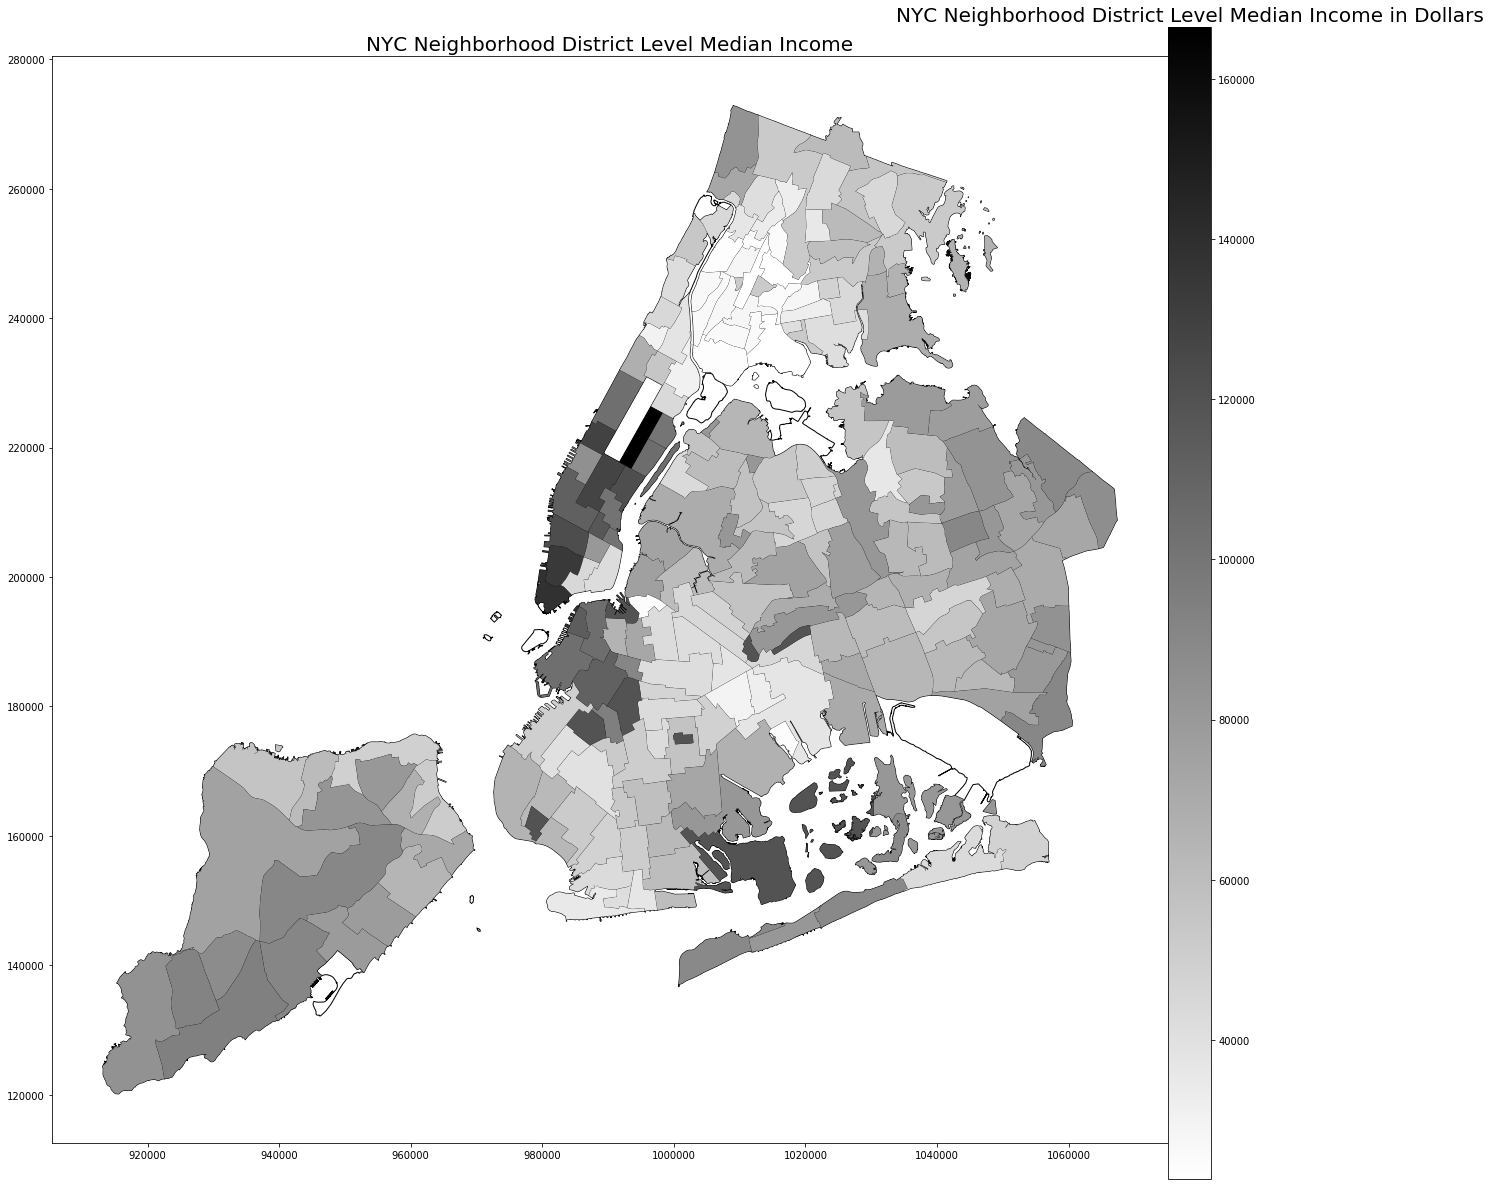

In [207]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
vmin, vmax = min(NYN_merged['Median_Income']) , max(NYN_merged['Median_Income'])

base = nynta.plot( color = 'white', edgecolor='black' ,ax = ax)
NYN_merged.plot(column = 'Median_Income', cmap = 'binary', edgecolor='black', linewidth = 0.1 ,ax =ax)

plt.title('NYC Neighborhood District Level Median Income', fontsize =20)


# adding heat map
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='binary', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable...
sm._A = []
fig.colorbar(sm, cax=cax)

plt.title('NYC Neighborhood District Level Median Income in Dollars', fontsize = 20)

#### it looks clustering but I will use Global and Local Moran's I to find the clustering

In [48]:
NYN_merged.to_file('merged')

In [49]:
shp_link = ('/home/cusp/sk6176/GIS_Project/merged/merged.shp')

In [50]:
w = ps.weights.rook_from_shapefile(shp_link) 
WRmatrix, ids = w.full()

WRmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [51]:
MI = NYN_merged['Median_Income_std']

In [52]:
w.transform = 'r'

MILag = ps.lag_spatial(w, MI)

MILagQ10 = ps.Quantiles(MILag, k = 10)
MILagQ10

               Quantiles                
 
Lower            Upper             Count
         x[i] <= -0.915               20
-0.915 < x[i] <= -0.619               19
-0.619 < x[i] <= -0.353               19
-0.353 < x[i] <= -0.072               19
-0.072 < x[i] <=  0.035               19
 0.035 < x[i] <=  0.186               19
 0.186 < x[i] <=  0.388               19
 0.388 < x[i] <=  0.661               19
 0.661 < x[i] <=  1.044               19
 1.044 < x[i] <=  2.564               19

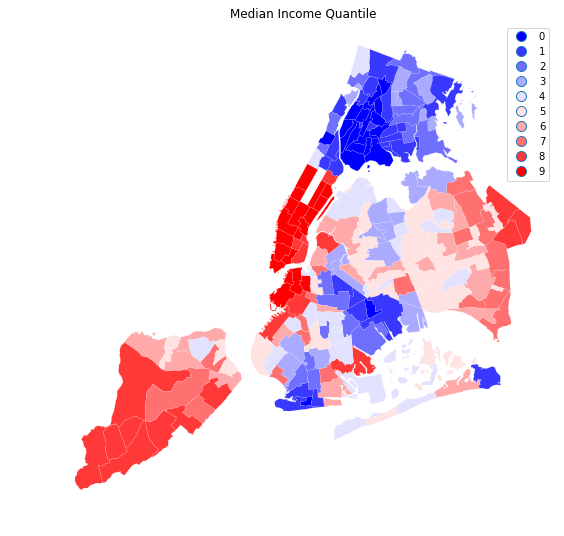

In [53]:
f, ax = plt.subplots(figsize=(9, 9))
NYN_merged.assign(cl=MILagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='bwr', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Median Income Quantile")

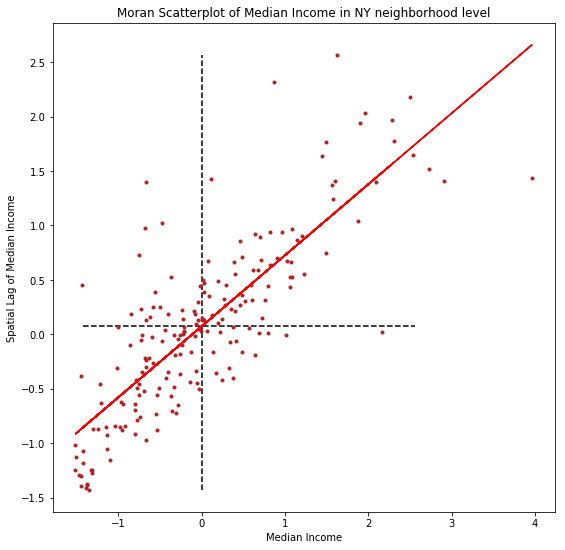

In [54]:
b,a = np.polyfit(MI, MILag, 1)

f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(NYN_merged['Median_Income_std'], MILag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MI.mean(), MILag.min(), MILag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MILag.mean(), MILag.min(), MILag.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MI, a + b * MI, 'r')
plt.title('Moran Scatterplot of Median Income in NY neighborhood level')
plt.ylabel('Spatial Lag of Median Income')
plt.xlabel('Median Income')

In [55]:
I_MI = ps.Moran(MI, w)
I_MI.I, I_MI.p_sim

(0.65190825695054766, 0.001)

In [56]:
I_MI.EI

-0.005263157894736842

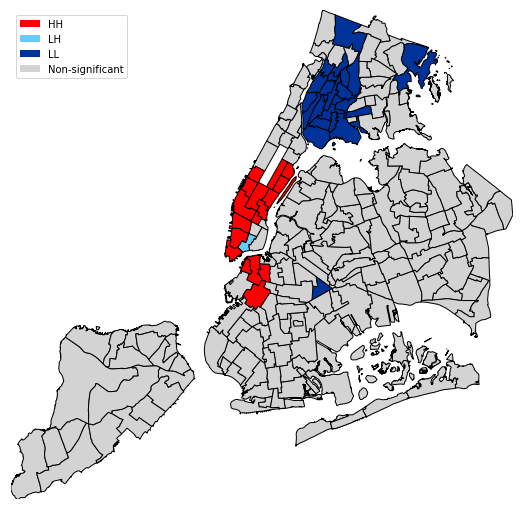

In [58]:
MI = np.array(MI)

Local_MI = ps.Moran_Local(MI, w, permutations=99999)

_ = maps.plot_lisa_cluster(shp_link, Local_MI, figsize=(9, 9), leg_loc=2)

#### I found out that all Manhattan and Park slople area is High-High, which is riches are clustered and The Bronx is Low-Low, poors are clustered, too.


#### Now Let's see the high-level entertainment.  How they are clustered

##### Let's bring Theatre dta

In [59]:
theater = gpd.read_file('/home/cusp/sk6176/GIS_Project/teater/geo_export_de7ea18d-eb24-4067-b68b-c5c840746394.shp')

In [60]:
theater.head()

url      city      zip  \
0  http://www.theatermania.com/new-york/theaters/...  New York  10036.0   
1  http://www.bestofoffbroadway.com/theaters/47st...  New York  10036.0   
2                              http://www.59e59.org/  New York  10022.0   
3             http://www.theatrerow.org/theacorn.htm  New York  10036.0   
4  http://www.newyorkcitytheatre.com/theaters/alh...  New York  10036.0   

               address1                   name             tel addres2  \
0  354 West 45th Street    45th Street Theater  (212) 352-3101    None   
1  304 West 47th Street    47th Street Theater  (800) 775-1617    None   
2   59 East 59th Street                  59E59  (212) 753-5959    None   
3  410 West 42nd Street          Acorn Theater  (212) 279-4200    None   
4     302 W 45th Street  Al Hirschfeld Theater  (212) 239-6200    None   

                                       geometry  
0  POINT (-73.99061840882582 40.75985115447559)  
1  POINT (-73.98810595253769 40.76047123447081)  
2  POINT (-73.97038450260143 40.76339942774153)  
3   POINT (-73.99332384622063 40.7585366821068)  
4  POINT (-73.98921433402219 40.75926091219353)

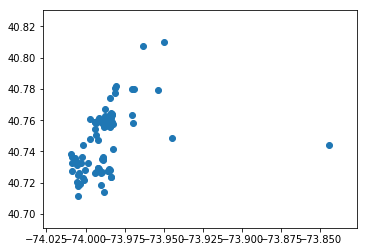

In [61]:
theater.plot()

#### Making a projection corretly

In [62]:
naec = '+proj=eqdc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'

In [63]:
theater_ft = theater.to_crs(epsg=2263)
NYN_merged_ft = NYN_merged.to_crs(epsg = 2263)

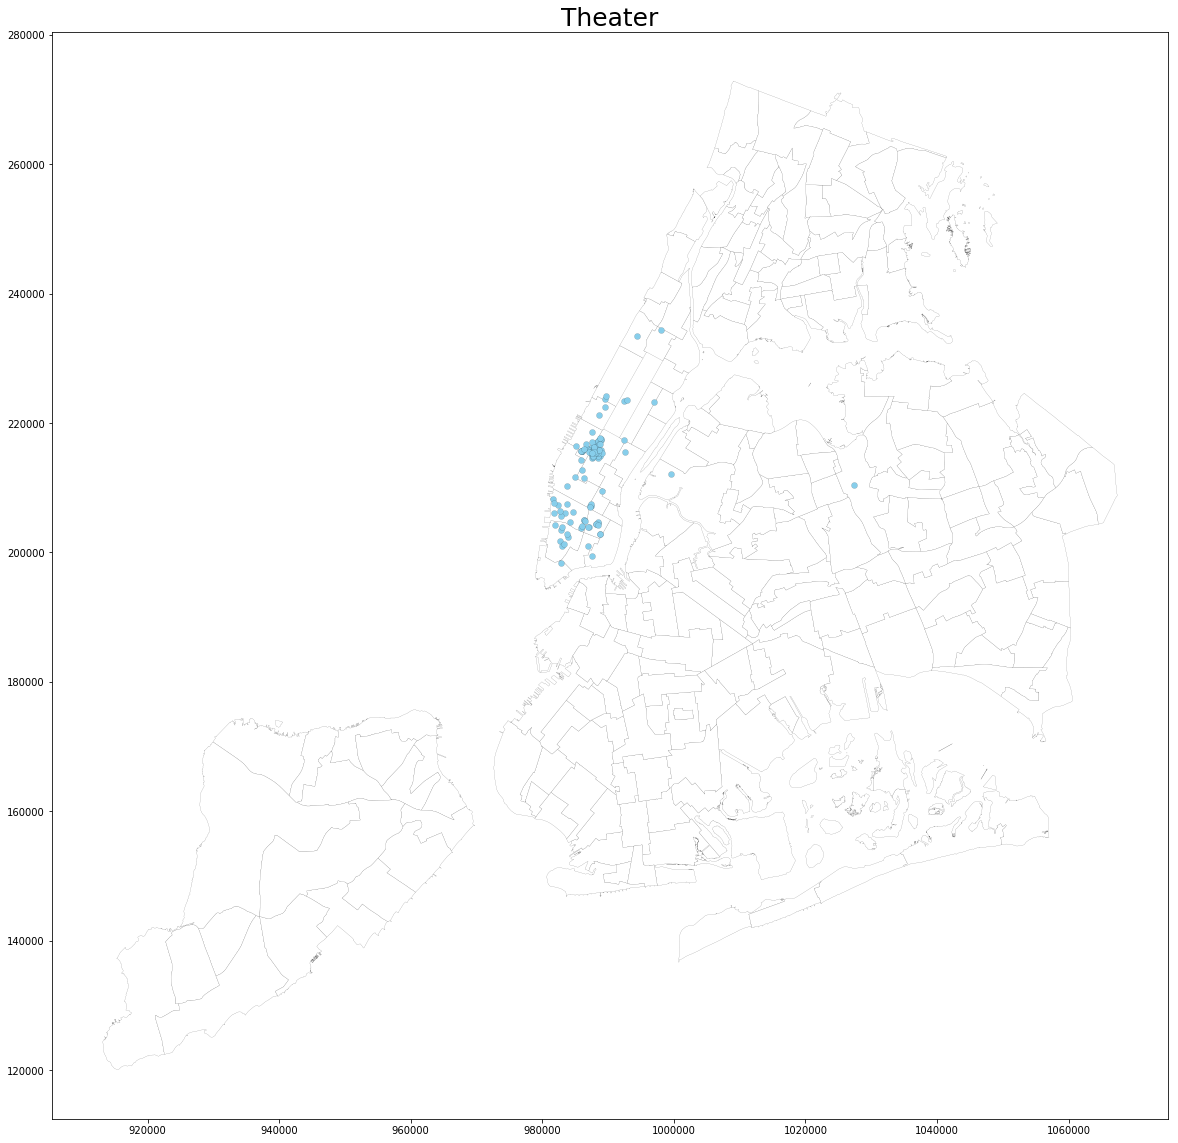

In [201]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
base = NYN_merged_ft.plot(color='white', edgecolor='black', linewidth = 0.1 ,ax =ax)
theater_ft.plot(color='skyblue', edgecolor='black', linewidth = 0.1 ,ax =ax)

plt.title('Theater', fontsize = 25)

In [65]:
T_count = gpd.sjoin(NYN_merged_ft.reset_index(drop=True), theater_ft)

In [66]:
T_count.head()

BoroCode   BoroName CountyFIPS NTACode                  NTAName  \
13         1  Manhattan        061    MN19  Turtle Bay-East Midtown   
70         1  Manhattan        061    MN15                  Clinton   
70         1  Manhattan        061    MN15                  Clinton   
70         1  Manhattan        061    MN15                  Clinton   
70         1  Manhattan        061    MN15                  Clinton   

      Shape_Leng    Shape_Area  \
13  21412.598187  1.739327e+07   
70  35037.171670  1.838139e+07   
70  35037.171670  1.838139e+07   
70  35037.171670  1.838139e+07   
70  35037.171670  1.838139e+07   

                                             geometry NTA_Code  \
13  (POLYGON ((994988.9536132801 209035.2724119911...     MN19   
70  POLYGON ((985958.6516113296 220876.7498289782,...     MN15   
70  POLYGON ((985958.6516113296 220876.7498289782,...     MN15   
70  POLYGON ((985958.6516113296 220876.7498289782,...     MN15   
70  POLYGON ((985958.6516113296 220876.7498289782,...     MN15   

    2010CensusTract   ...    Median_Income  Median_Income_std  index_right  \
13      9660.800000   ...    122186.500000           2.279710          115   
70     12842.857143   ...     85290.571429           0.874143           85   
70     12842.857143   ...     85290.571429           0.874143           50   
70     12842.857143   ...     85290.571429           0.874143           37   
70     12842.857143   ...     85290.571429           0.874143            3   

                                                  url      city      zip  \
13                        http://www.yorktheatre.org/  New York  10022.0   
70                                http://www.2st.com/  New York  10036.0   
70  http://www.nytheatre.com/nytheatre/venue.php?t...  New York  10036.0   
70  http://www.theatermania.com/new-york/theaters/...  New York  10036.0   
70             http://www.theatrerow.org/theacorn.htm  New York  10036.0   

                address1                    name             tel addres2  
13     619 Lexington Ave            York Theatre  (212) 935-5820    None  
70         307 W 43rd St    Second Stage Theater  (212) 246-4422    None  
70         410 W 42nd St            Lion Theatre  (212) 714-2442    None  
70         412 W 42nd St  Harold Clurman Theater  (888) VISIT-NY    None  
70  410 West 42nd Street           Acorn Theater  (212) 279-4200    None  

[5 rows x 23 columns]

In [67]:
T_count.shape

(115, 23)

In [68]:
T_count.NTACode.value_counts()

MN17    46
MN15    15
MN23    15
MN22     9
MN24     8
MN21     5
MN13     3
MN12     2
MN14     2
MN40     2
MN28     1
QN31     1
MN09     1
MN27     1
MN25     1
MN11     1
QN99     1
MN19     1
Name: NTACode, dtype: int64

In [69]:
T_count = T_count.NTACode.value_counts().to_frame()

In [70]:
T_count.head()

NTACode
MN17       46
MN15       15
MN23       15
MN22        9
MN24        8

In [71]:
T_count.reset_index(level=0, inplace=True)

In [72]:
T_count = T_count.rename(columns= {'index': 'NTACode', 'NTACode' : 'N_of_Theater'})

In [73]:
T_count.head()

NTACode  N_of_Theater
0    MN17            46
1    MN15            15
2    MN23            15
3    MN22             9
4    MN24             8

In [74]:
Tmean = T_count['N_of_Theater'].mean()
Tstd = T_count['N_of_Theater'].std()
T_count['Std_Theater'] = T_count['N_of_Theater'] - Tmean  / Tstd

In [75]:
T_count.head()

NTACode  N_of_Theater  Std_Theater
0    MN17            46    45.415382
1    MN15            15    14.415382
2    MN23            15    14.415382
3    MN22             9     8.415382
4    MN24             8     7.415382

In [76]:
NYN_theater_shp = NYN_merged.merge(T_count, left_on = 'NTACode', right_on = 'NTACode' , how = 'outer')

In [77]:
NYN_theater_shp.head()

BoroCode  BoroName CountyFIPS NTACode        NTAName    Shape_Leng  \
0         3  Brooklyn        047    BK88   Borough Park  39247.228028   
1         4    Queens        081    QN52  East Flushing  25843.364936   
2         4    Queens        081    QN48     Auburndale  32446.878673   
3         4    Queens        081    QN51    Murray Hill  33266.904811   
4         4    Queens        081    QN27  East Elmhurst  19816.712323   

     Shape_Area                                           geometry NTA_Code  \
0  5.400502e+07  POLYGON ((990897.9000244141 169268.1207885742,...     BK88   
1  2.945438e+07  POLYGON ((1041061.948242188 215429.4609985352,...     QN52   
2  3.416422e+07  POLYGON ((1046392.971191406 210169.7536010742,...     QN48   
3  5.248828e+07  POLYGON ((1038593.459228516 221913.3550415039,...     QN51   
4  1.972685e+07  POLYGON ((1022728.275024414 217530.8082275391,...     QN27   

   2010CensusTract    PUMA  census_tract             TH  Median_Income  \
0     28857.142857  4014.0  3.604703e+10   28857.142857   39765.750000   
1    116800.000000  4103.0  3.608112e+10  116800.000000   53511.666667   
2    135500.428571  4104.0  3.608114e+10  135500.428571   78223.857143   
3    111961.538462  4103.0  3.608111e+10  111961.538462   60080.000000   
4     36375.000000  4102.0  3.608104e+10   36375.000000   49822.375000   

   Median_Income_std  N_of_Theater  Std_Theater  
0          -0.860146           NaN          NaN  
1          -0.336489           NaN          NaN  
2           0.604933           NaN          NaN  
3          -0.086266           NaN          NaN  
4          -0.477035           NaN          NaN

In [78]:
NYN_theater_shp['Std_Theater'].fillna(0, inplace=True)
NYN_theater_shp['N_of_Theater'].fillna(0, inplace=True)

In [79]:
NYN_theater_shp.head()

BoroCode  BoroName CountyFIPS NTACode        NTAName    Shape_Leng  \
0         3  Brooklyn        047    BK88   Borough Park  39247.228028   
1         4    Queens        081    QN52  East Flushing  25843.364936   
2         4    Queens        081    QN48     Auburndale  32446.878673   
3         4    Queens        081    QN51    Murray Hill  33266.904811   
4         4    Queens        081    QN27  East Elmhurst  19816.712323   

     Shape_Area                                           geometry NTA_Code  \
0  5.400502e+07  POLYGON ((990897.9000244141 169268.1207885742,...     BK88   
1  2.945438e+07  POLYGON ((1041061.948242188 215429.4609985352,...     QN52   
2  3.416422e+07  POLYGON ((1046392.971191406 210169.7536010742,...     QN48   
3  5.248828e+07  POLYGON ((1038593.459228516 221913.3550415039,...     QN51   
4  1.972685e+07  POLYGON ((1022728.275024414 217530.8082275391,...     QN27   

   2010CensusTract    PUMA  census_tract             TH  Median_Income  \
0     28857.142857  4014.0  3.604703e+10   28857.142857   39765.750000   
1    116800.000000  4103.0  3.608112e+10  116800.000000   53511.666667   
2    135500.428571  4104.0  3.608114e+10  135500.428571   78223.857143   
3    111961.538462  4103.0  3.608111e+10  111961.538462   60080.000000   
4     36375.000000  4102.0  3.608104e+10   36375.000000   49822.375000   

   Median_Income_std  N_of_Theater  Std_Theater  
0          -0.860146           0.0          0.0  
1          -0.336489           0.0          0.0  
2           0.604933           0.0          0.0  
3          -0.086266           0.0          0.0  
4          -0.477035           0.0          0.0

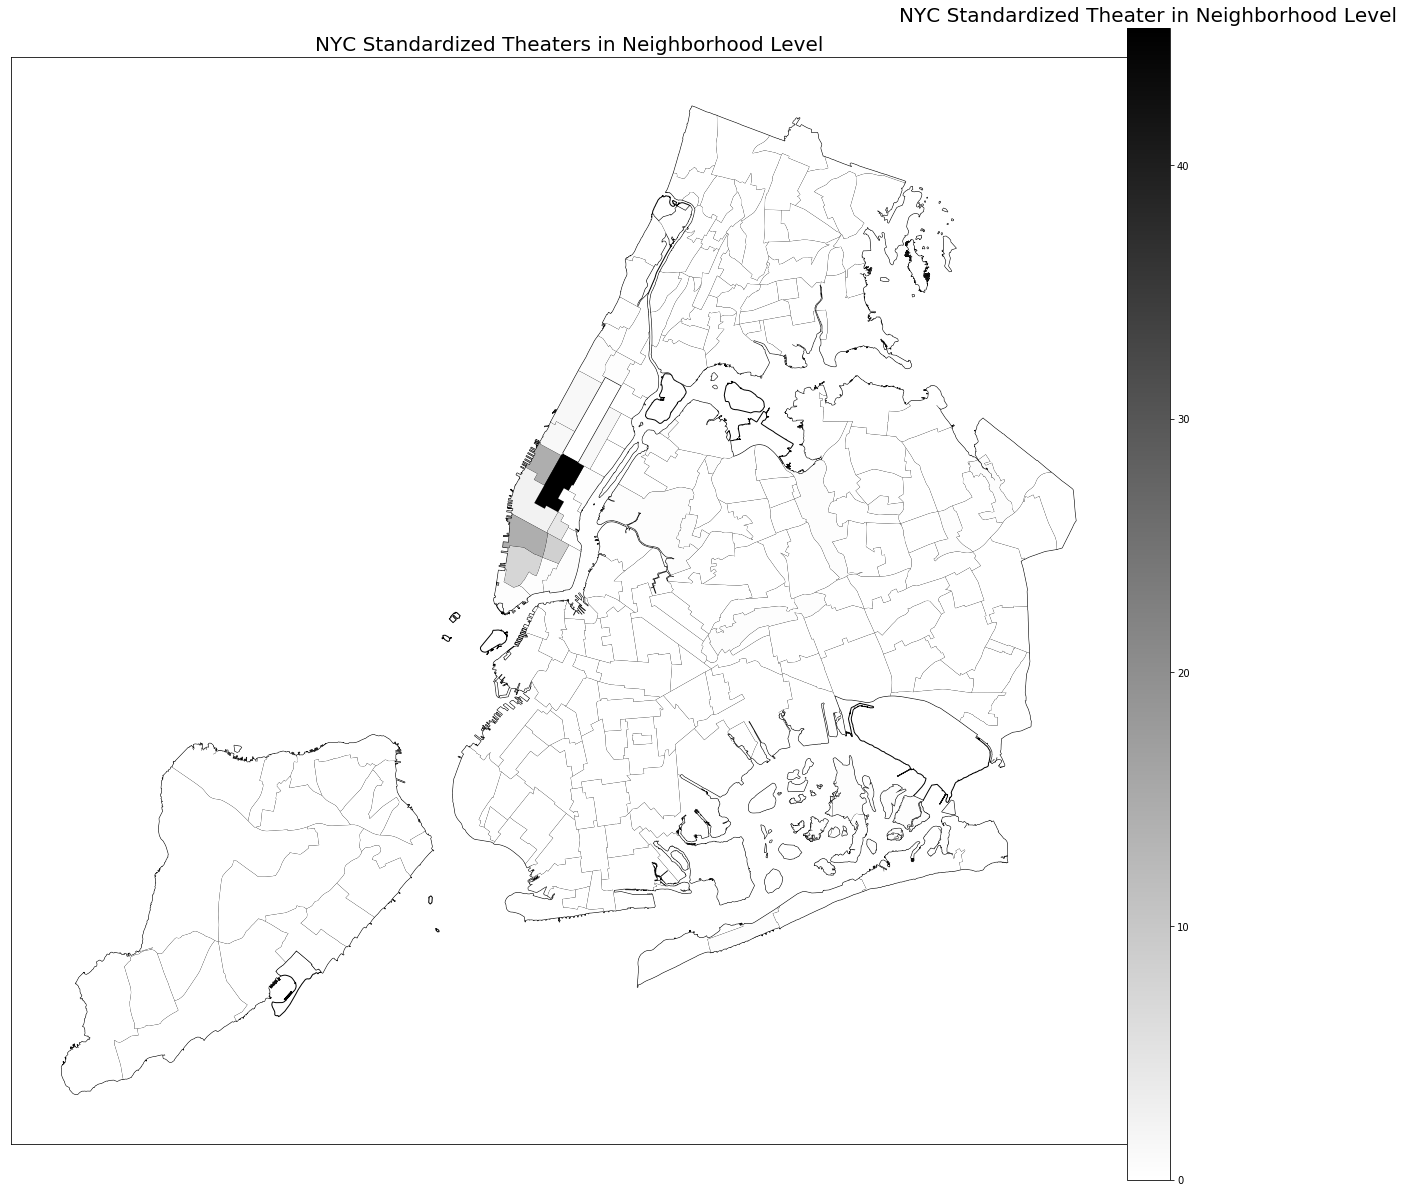

In [80]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
vmin, vmax = min(NYN_theater_shp['Std_Theater']) , max(NYN_theater_shp['Std_Theater'])


base = nynta.plot( color = 'white', edgecolor='black' ,ax = ax)
NYN_theater_shp.plot(column = 'Std_Theater', cmap='binary',vmin = vmin, vmax = vmax ,edgecolor='black', linewidth = 0.1 ,ax =ax)
plt.title('NYC Standardized Theaters in Neighborhood Level', fontsize = 20)
# adding heat map
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='binary', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# fake up the array of the scalar mappable...
sm._A = []
fig.colorbar(sm, cax=cax)

plt.title('NYC Standardized Theater in Neighborhood Level', fontsize = 20)

#### Broadway is famouse for theather district so the Time Square area is very condenced with theaters. And it's confirmed that Rich people area has theater district. However, historically, Time Square area is a very bad area so I need to look it up the historical development of the Theaters in NYC

#### It's obviouse to find Global and Local Moran's I but let's do it

In [81]:
T = NYN_theater_shp['Std_Theater'] 
theaterLag = ps.lag_spatial(w, T)

theaterLagQ10 = ps.Quantiles(theaterLag, k = 10)
theaterLagQ10

                Quantiles                
 
Lower            Upper              Count
         x[i] <=  0.000               126
 0.000 < x[i] <=  0.069                14
 0.069 < x[i] <=  0.104                19
 0.104 < x[i] <=  0.458                13
 0.458 < x[i] <= 20.415                19

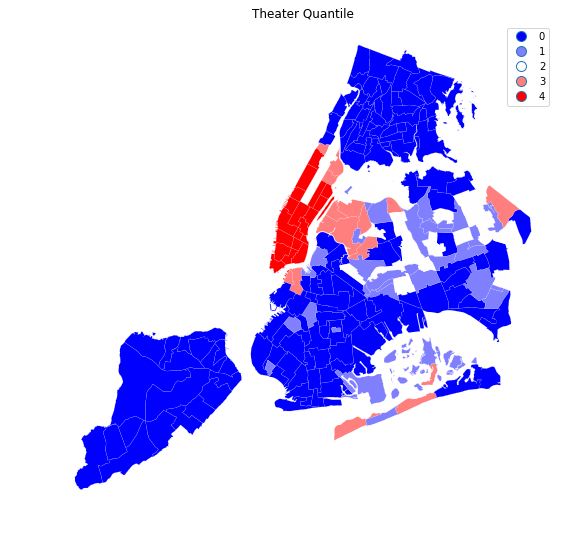

In [82]:
f, ax = plt.subplots(figsize=(9, 9))
NYN_merged.assign(cl=theaterLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='bwr', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Theater Quantile")

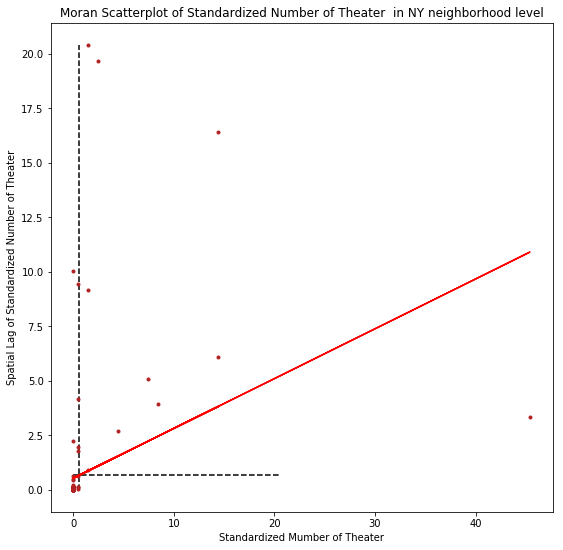

In [83]:
b,a = np.polyfit(T, theaterLag, 1)

f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(T, theaterLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(T.mean(), theaterLag.min(), theaterLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(theaterLag.mean(), theaterLag.min(), theaterLag.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(T, a + b * T, 'r')
plt.title('Moran Scatterplot of Standardized Number of Theater  in NY neighborhood level')
plt.ylabel('Spatial Lag of Standardized Number of Theater')
plt.xlabel('Standardized Mumber of Theater')

In [84]:
I_T = ps.Moran(T, w)
I_T.I, I_T.p_sim

(0.22854884320475261, 0.002)

### The Global Moran's I value is 0.229, which is very low than I expected. However, it's make sense because it examines in globally. Local Moran's I should give a better view

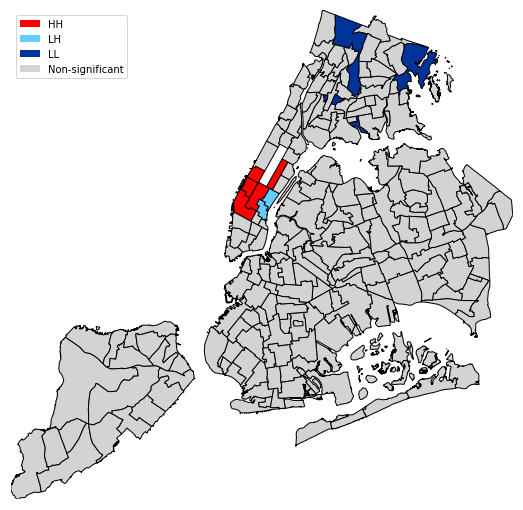

In [85]:
T = np.array(T)
Local_T = ps.Moran_Local(T, w, permutations=99999)
_ = maps.plot_lisa_cluster(shp_link, Local_T, figsize=(9, 9), leg_loc=2)


#### Art Galleries


In [86]:
galleries = gpd.read_file('/home/cusp/sk6176/GIS_Project/Galleries/geo_export_6f68c476-9607-46a5-bb92-38029c58bce8.shp')

In [87]:
galleries.head()

city                                                url      zip  \
0  New York  http://www.nyc.com/arts__attractions/oreilly_w...  10021.0   
1  New York  http://www.nonprofitgallery.com/main/usa/ny/oi...  10013.0   
2  New York                http://www.owengallery.com/about-us  10021.0   
3  New York                        http://www.ppowgallery.com/  10001.0   
4  New York  http://www.nyc.com/arts__attractions/p_p_o_w_i...  10013.0   

                                                name       address1  \
0                          O'reilly William & Co Ltd   52 E 76th St   
1  Organization of Independent Artists - Gallery 402  19 Hudson St.   
2                                       Owen Gallery   19 E 75th St   
3                                   P P O W Gallerie  511 W 25th St   
4                                        P P O W Inc  476 Broome St   

              tel address2                                      geometry  
0  (212) 396-1822     None  POINT (-73.96273074561996 40.77380087163758)  
1  (212) 219-9213     None   POINT (-74.0093857886298 40.71646850931738)  
2  (212) 879-2415     None   POINT (-73.96435178145856 40.7740008522409)  
3  (212) 647-1044     None  POINT (-74.00389261044238 40.74958540084406)  
4  (212) 941-8642     None  POINT (-74.00176389614576 40.72290742771331)

In [88]:
galleries.shape

(917, 8)

In [89]:
galleries_ft = galleries.to_crs(epsg=2263)

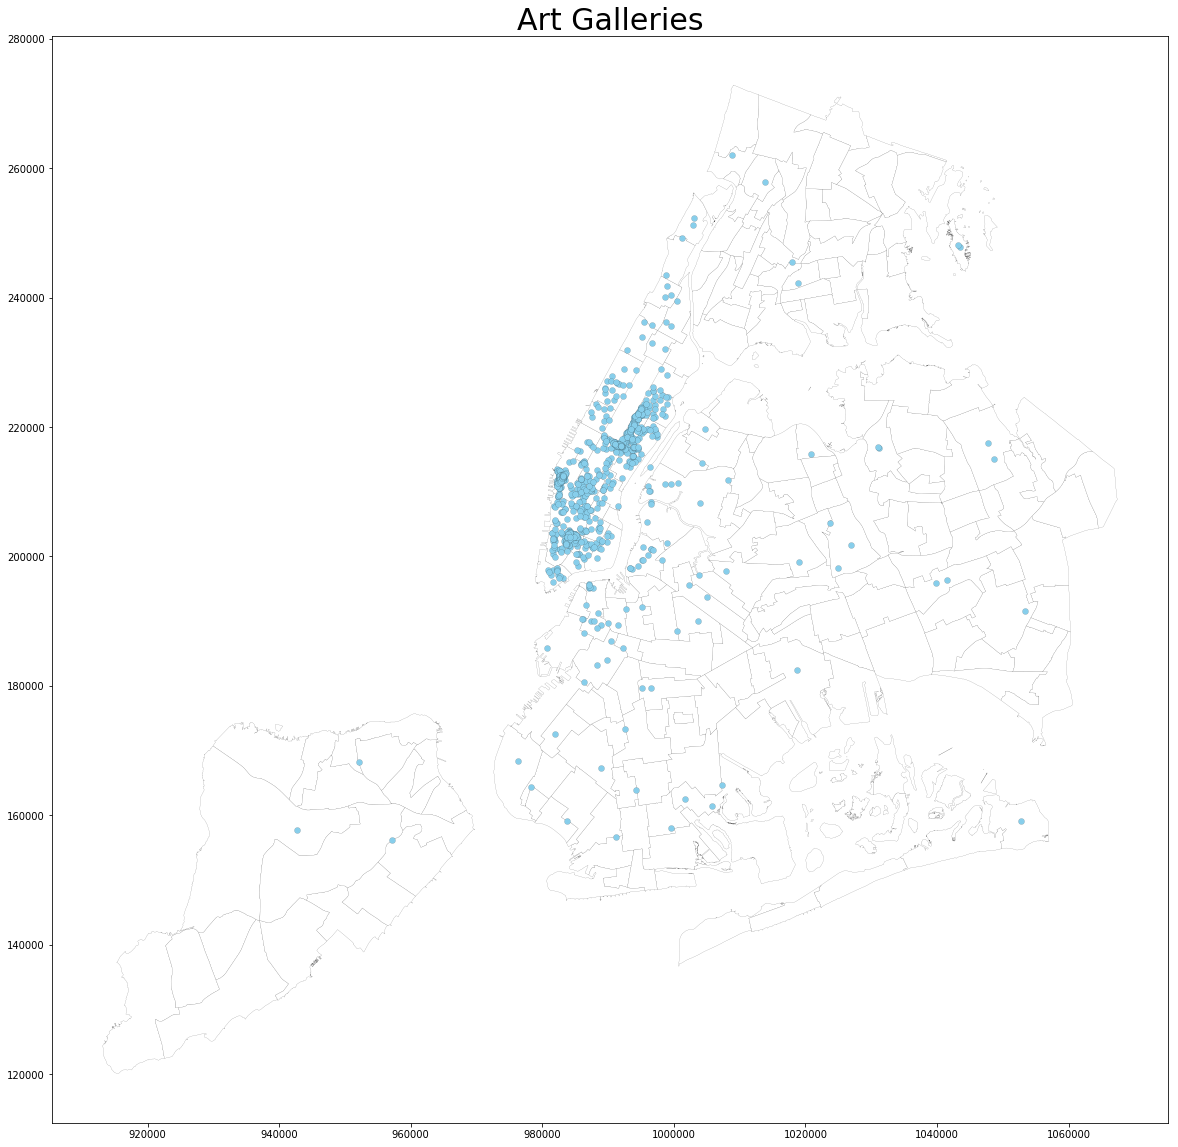

In [90]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
base = NYN_merged_ft.plot(color='white', edgecolor='black', linewidth = 0.1 ,ax =ax)
galleries_ft.plot(color='skyblue', edgecolor='black', linewidth = 0.1 ,ax =ax)

plt.title('Art Galleries', fontsize = 30)

#### Sjoin to find intersection

In [91]:
galleries_joint = gpd.sjoin(NYN_merged_ft.reset_index(drop=True), galleries_ft)

galleries_count = galleries_joint['NTACode'].value_counts().to_frame()

galleries_count.reset_index(level=0, inplace=True)

galleries_count.head()

index  NTACode
0  MN13      208
1  MN40      153
2  MN24      116
3  MN17      107
4  MN23       42

In [92]:
galleries_count = galleries_count.rename(columns = {'index': 'NTACode', 'NTACode' : 'N_Galleries'})

galleries_count.head()

NTACode  N_Galleries
0    MN13          208
1    MN40          153
2    MN24          116
3    MN17          107
4    MN23           42

In [93]:
Gmean = galleries_count['N_Galleries'].mean()
Gstd = galleries_count['N_Galleries'].std()
galleries_count['Std_Galleries'] = galleries_count['N_Galleries'] - Gmean  / Gstd

In [94]:
NYN_galleries_shp = NYN_merged.merge(galleries_count, left_on = 'NTACode', 
                                         right_on = 'NTACode' , how = 'outer' )

In [95]:
NYN_galleries_shp.shape

(191, 17)

In [96]:
NYN_galleries_shp.head()

BoroCode  BoroName CountyFIPS NTACode        NTAName    Shape_Leng  \
0         3  Brooklyn        047    BK88   Borough Park  39247.228028   
1         4    Queens        081    QN52  East Flushing  25843.364936   
2         4    Queens        081    QN48     Auburndale  32446.878673   
3         4    Queens        081    QN51    Murray Hill  33266.904811   
4         4    Queens        081    QN27  East Elmhurst  19816.712323   

     Shape_Area                                           geometry NTA_Code  \
0  5.400502e+07  POLYGON ((990897.9000244141 169268.1207885742,...     BK88   
1  2.945438e+07  POLYGON ((1041061.948242188 215429.4609985352,...     QN52   
2  3.416422e+07  POLYGON ((1046392.971191406 210169.7536010742,...     QN48   
3  5.248828e+07  POLYGON ((1038593.459228516 221913.3550415039,...     QN51   
4  1.972685e+07  POLYGON ((1022728.275024414 217530.8082275391,...     QN27   

   2010CensusTract    PUMA  census_tract             TH  Median_Income  \
0     28857.142857  4014.0  3.604703e+10   28857.142857   39765.750000   
1    116800.000000  4103.0  3.608112e+10  116800.000000   53511.666667   
2    135500.428571  4104.0  3.608114e+10  135500.428571   78223.857143   
3    111961.538462  4103.0  3.608111e+10  111961.538462   60080.000000   
4     36375.000000  4102.0  3.608104e+10   36375.000000   49822.375000   

   Median_Income_std  N_Galleries  Std_Galleries  
0          -0.860146          1.0       0.629744  
1          -0.336489          NaN            NaN  
2           0.604933          NaN            NaN  
3          -0.086266          NaN            NaN  
4          -0.477035          1.0       0.629744

In [97]:
NYN_galleries_shp['Std_Galleries'].fillna(0, inplace=True)
NYN_galleries_shp['N_Galleries'].fillna(0, inplace=True)


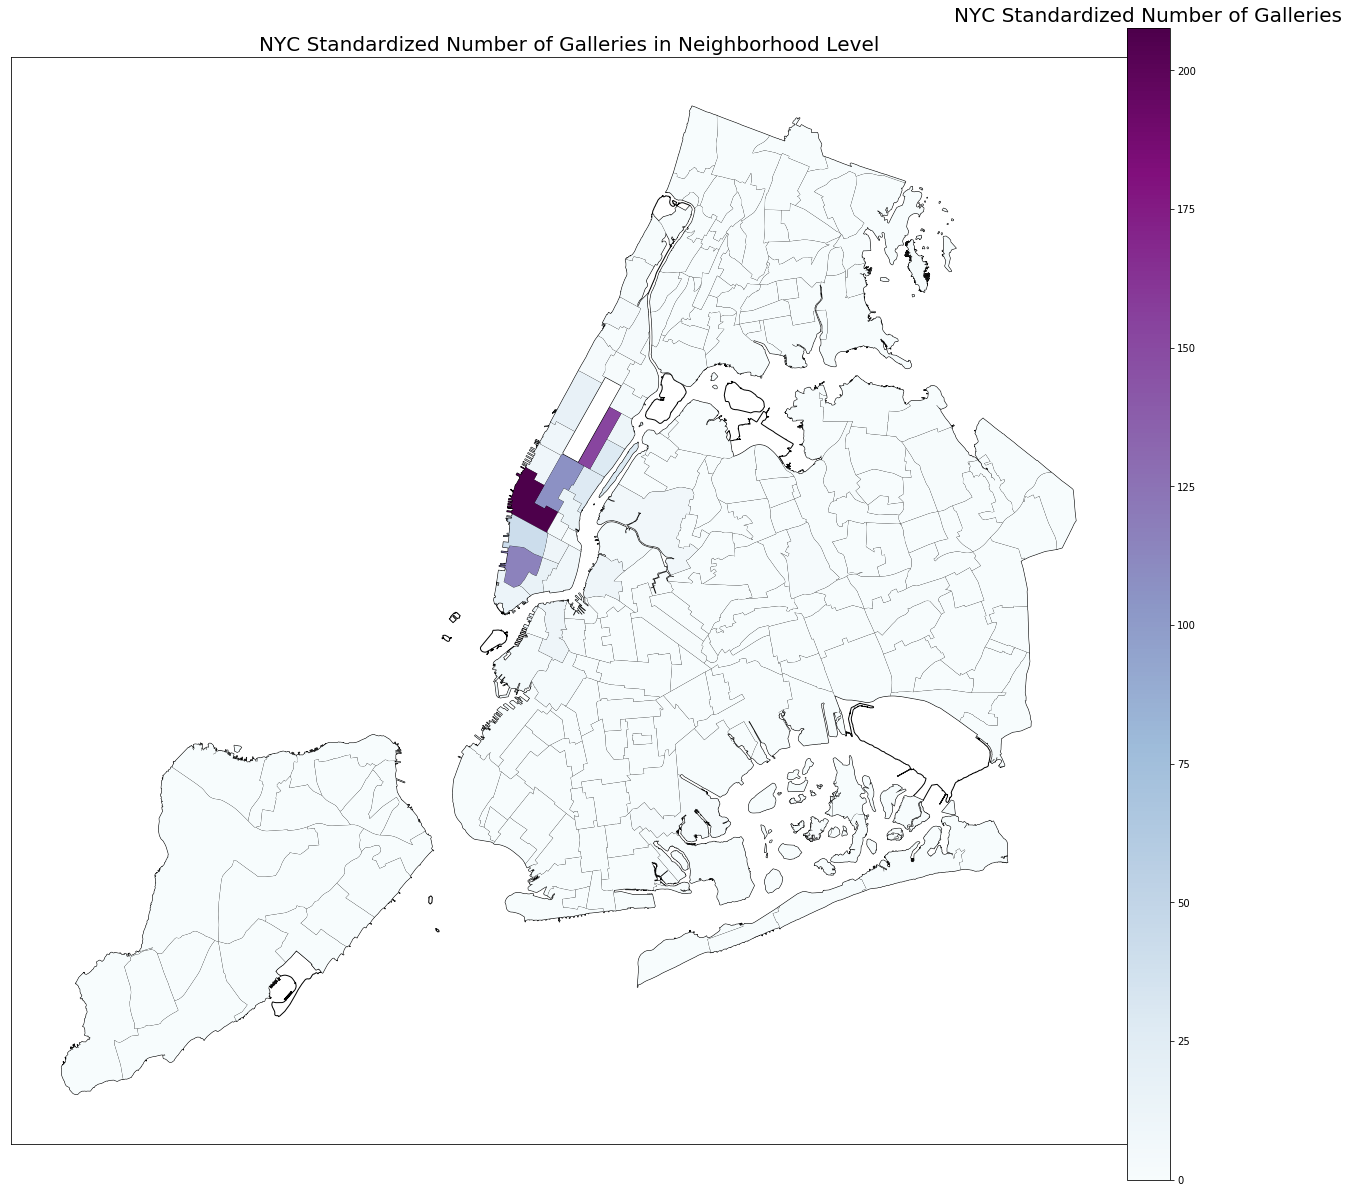

In [98]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
vmin, vmax = min(NYN_galleries_shp['Std_Galleries']) , max(NYN_galleries_shp['Std_Galleries'])


base = nynta.plot( color = 'white', edgecolor='black' ,ax = ax)
NYN_galleries_shp.plot(column = 'Std_Galleries', cmap='BuPu',vmin = vmin, 
                       vmax = vmax ,edgecolor='black', linewidth = 0.1 ,ax =ax)
plt.title('NYC Standardized Number of Galleries in Neighborhood Level', fontsize = 20)
# adding heat map
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable...
sm._A = []
fig.colorbar(sm, cax=cax)

plt.title('NYC Standardized Number of Galleries', fontsize = 20)

#### The Art Galleries shows Chealsea, SOHO, Midtown, and upper east has most galleries whicih is make sense. It shows only Manhattan has most rich business has it

#### Let's do Global and Local Moran's I

In [99]:
G = NYN_galleries_shp['Std_Galleries'] 
GLag = ps.lag_spatial(w, G)

GLagQ10 = ps.Quantiles(GLag, k = 10)
GLagQ10

                Quantiles                 
 
 Lower            Upper              Count
          x[i] <=   0.000               49
  0.000 < x[i] <=   0.126               20
  0.126 < x[i] <=   0.157               16
  0.157 < x[i] <=   0.233               11
  0.233 < x[i] <=   0.326               20
  0.326 < x[i] <=   0.543               18
  0.543 < x[i] <=   1.447               19
  1.447 < x[i] <=   6.630               19
  6.630 < x[i] <= 111.296               19

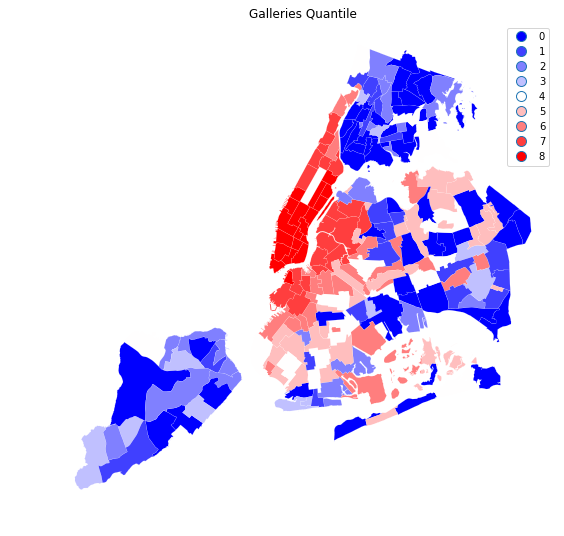

In [100]:
f, ax = plt.subplots(figsize=(9, 9))
NYN_merged.assign(cl=GLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='bwr', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Galleries Quantile")

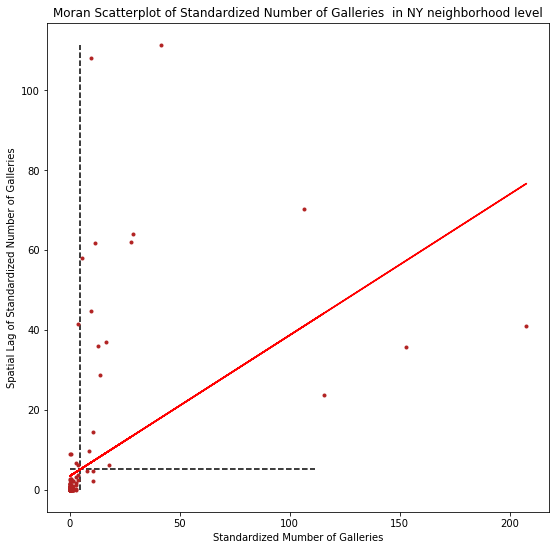

In [101]:
b,a = np.polyfit(G, GLag, 1)

f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(G, GLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(G.mean(), GLag.min(), GLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(GLag.mean(), GLag.min(), GLag.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(G, a + b * G, 'r')
plt.title('Moran Scatterplot of Standardized Number of Galleries  in NY neighborhood level')
plt.ylabel('Spatial Lag of Standardized Number of Galleries')
plt.xlabel('Standardized Mumber of Galleries')

In [102]:
I_G = ps.Moran(G, w)
I_G.I, I_G.p_sim

(0.35245521261122398, 0.001)

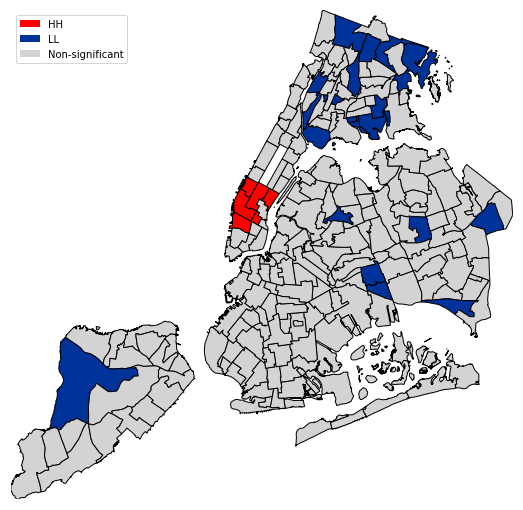

In [103]:
G = np.array(G)
Local_G = ps.Moran_Local(G, w, permutations=99999)
_ = maps.plot_lisa_cluster(shp_link, Local_G, figsize=(9, 9), leg_loc=2)

#### Classical Music Theater

In [104]:
Classical = gpd.read_file('/home/cusp/sk6176/GIS_Project/Classical_Music/geo_export_d4b9c4b4-ed9d-47f1-9f00-283946ccf979.shp')

In [105]:
Classical.head()

address1      city      zip  \
0            319 Bowery  New York  10003.0   
1         1775 Broadway  New York  10019.0   
2    850 Seventh Avenue  New York  10018.0   
3  Fulton Ferry Landing  Brooklyn  11201.0   
4   189 Montague Street  Brooklyn  11201.0   

                                    url             tel  \
0                 http://www.amato.org/  (212) 228-8200   
1     http://www.americancomposers.org/  (212) 977-8495   
2    http://www.americanorchestras.org/  (212) 581-1365   
3            http://www.bargemusic.org/  (718) 624-2083   
4  http://www.brooklynphilharmonic.org/  (718) 622-5555   

                           name         address2  \
0           Amato Opera Company             None   
1  American Composers Orchestra        Suite 525   
2   American Symphony Orchestra        Suite 503   
3                    Bargemusic             None   
4         Brooklyn Philharmonic  BAM Opera House   

                                       geometry  
0  POINT (-73.99184539780428 40.72532399259921)  
1  POINT (-73.98224374816537 40.76690660946508)  
2   POINT (-73.98145510042576 40.7640504744572)  
3   POINT (-73.99527705332432 40.7031338793139)  
4  POINT (-73.99166690325696 40.69425851506696)

In [106]:
Classical_ft = Classical.to_crs(epsg=2263)

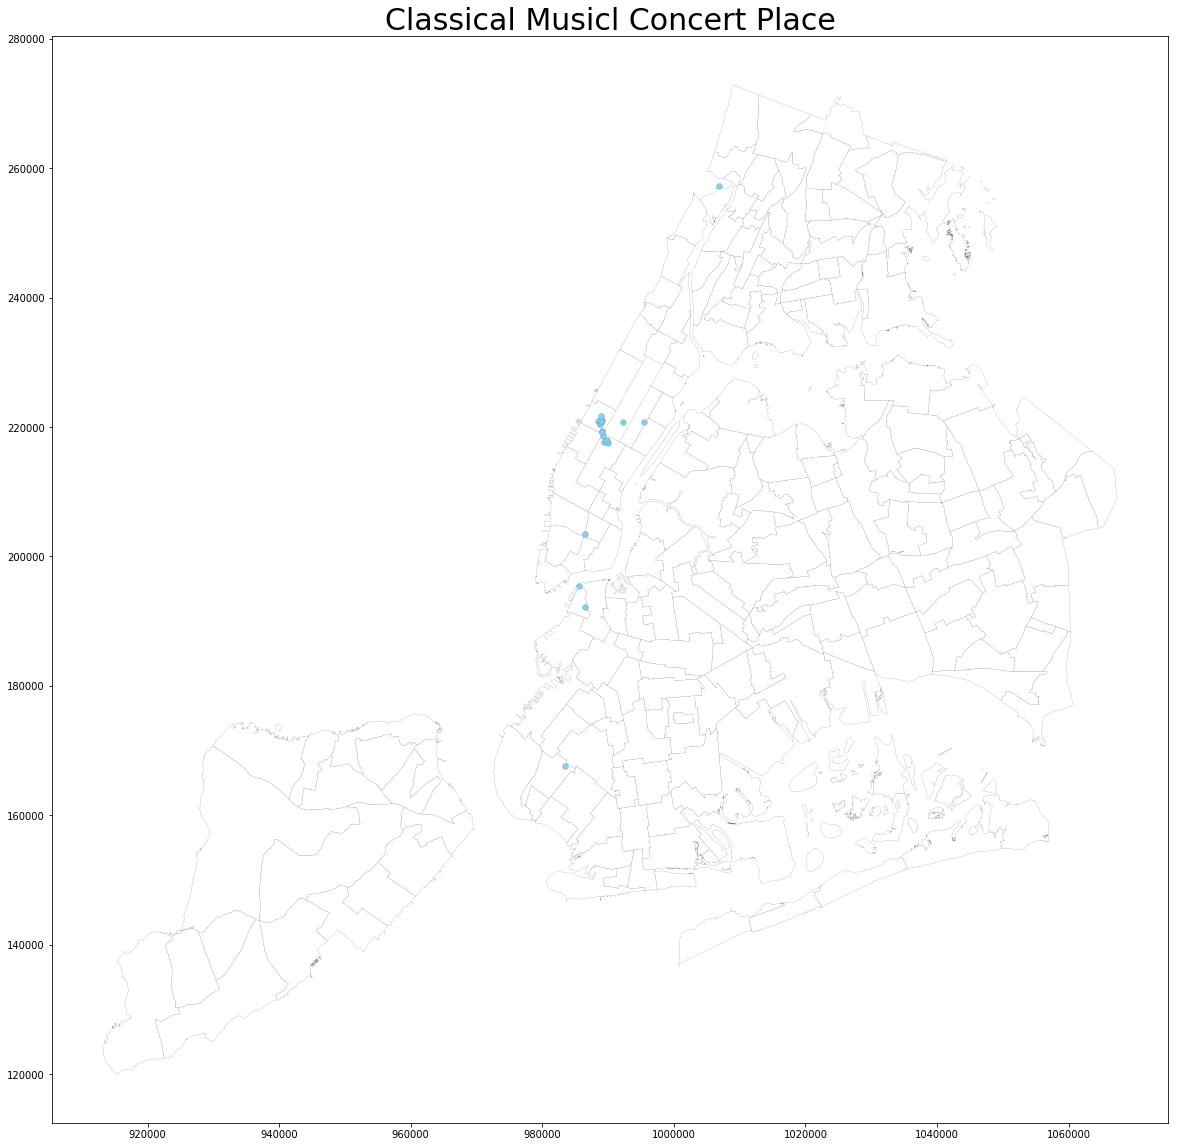

In [107]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
base = NYN_merged_ft.plot(color='white', edgecolor='black', linewidth = 0.1 ,ax =ax)
Classical_ft.plot(color='skyblue', edgecolor='black', linewidth = 0.1 ,ax =ax)

plt.title('Classical Musicl Concert Place', fontsize = 30)

In [108]:
C_joint = gpd.sjoin(NYN_merged_ft.reset_index(drop=True), Classical_ft)

C_count = C_joint['NTACode'].value_counts().to_frame()

C_count.reset_index(level=0, inplace=True)

C_count.head()

index  NTACode
0  MN14        9
1  MN17        4
2  MN22        1
3  MN40        1
4  BK30        1

In [109]:
C_count = C_count.rename(columns = {'index': 'NTACode', 'NTACode' : 'N_Classical_Music_Place'})

C_count.head()

NTACode  N_Classical_Music_Place
0    MN14                        9
1    MN17                        4
2    MN22                        1
3    MN40                        1
4    BK30                        1

#### Standardized it

In [110]:
Cmean = C_count['N_Classical_Music_Place'].mean()
Cstd = C_count['N_Classical_Music_Place'].std()
C_count['Std_Classical_Music_Place'] = C_count['N_Classical_Music_Place'] - Cmean  / Cstd

In [111]:
NYN_C_shp = NYN_merged.merge(C_count, left_on = 'NTACode', 
                                         right_on = 'NTACode' , how = 'outer' )

In [112]:
NYN_C_shp['Std_Classical_Music_Place'].fillna(0, inplace=True)
NYN_C_shp['N_Classical_Music_Place'].fillna(0, inplace=True)


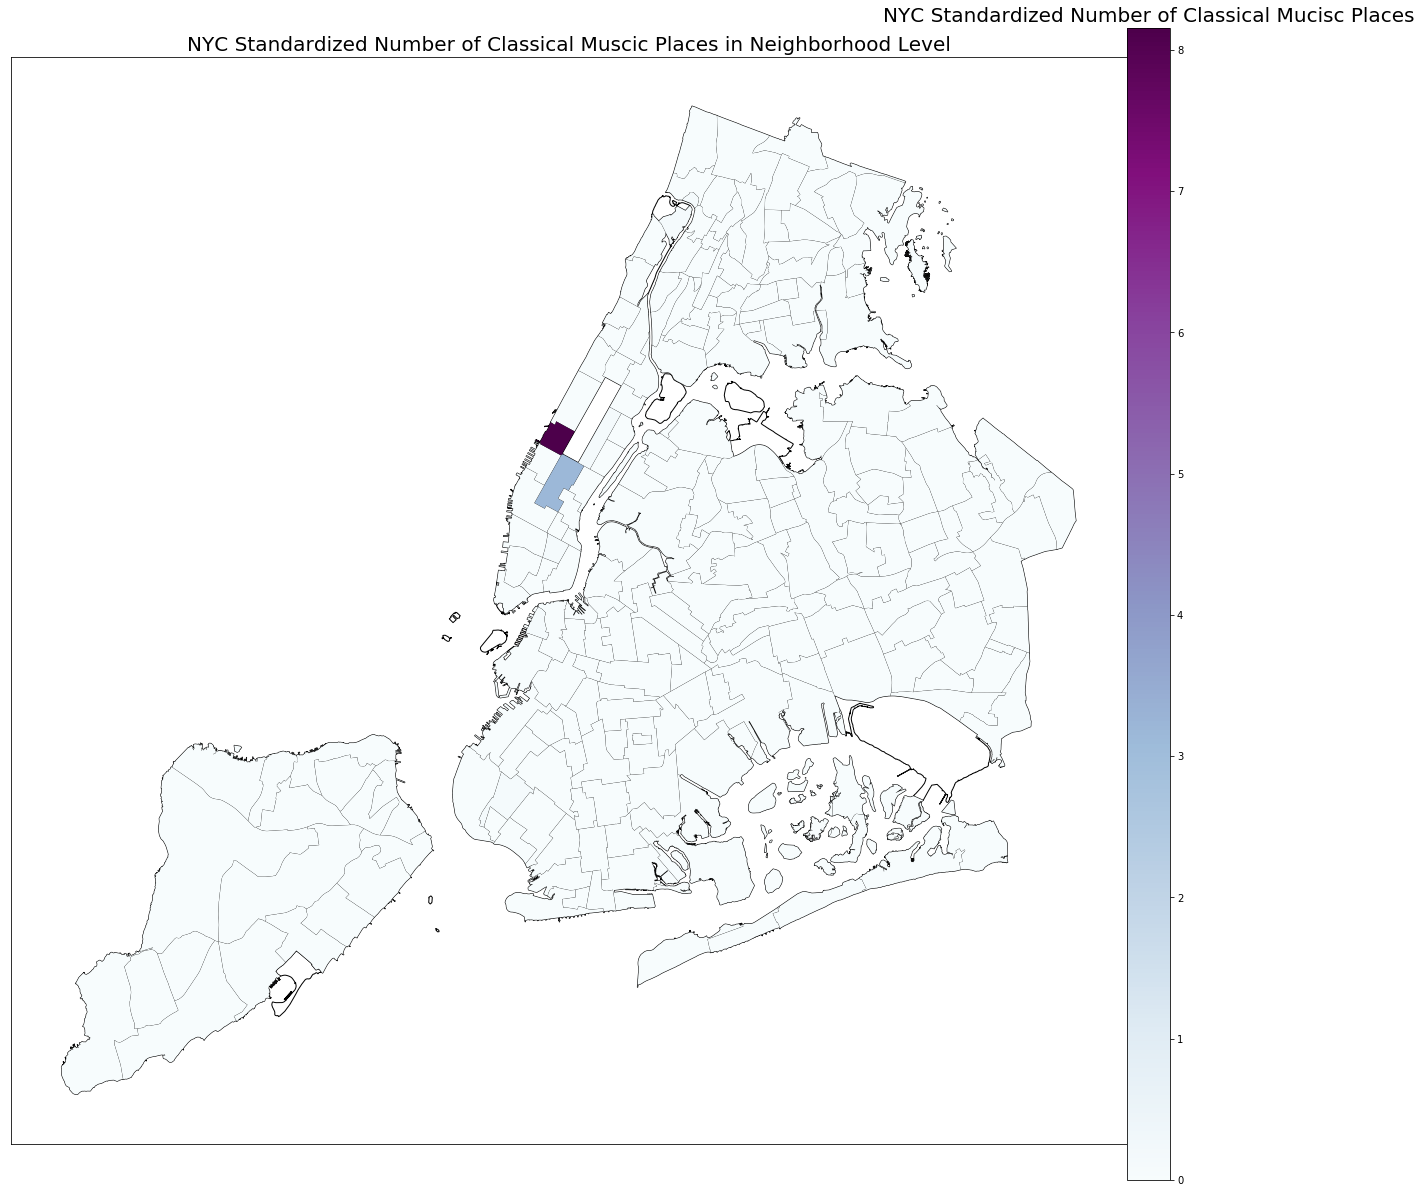

In [113]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
vmin, vmax = min(NYN_C_shp['Std_Classical_Music_Place']) , max(NYN_C_shp['Std_Classical_Music_Place'])

base = nynta.plot( color = 'white', edgecolor='black' ,ax = ax)
NYN_C_shp.plot(column = 'Std_Classical_Music_Place', cmap='BuPu',vmin = vmin, 
                       vmax = vmax ,edgecolor='black', linewidth = 0.1 ,ax =ax)
plt.title('NYC Standardized Number of Classical Muscic Places in Neighborhood Level', fontsize = 20)
# adding heat map
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable...
sm._A = []
fig.colorbar(sm, cax=cax)

plt.title('NYC Standardized Number of Classical Mucisc Places', fontsize = 20)

#### It shows only lower central park and Lincon Center shows where classical music is played. 

### Global Moran's I and Local Moran's I

In [114]:
C = NYN_C_shp['Std_Classical_Music_Place'] 
CLag = ps.lag_spatial(w, C)

CLagQ10 = ps.Quantiles(CLag, k = 10)
CLagQ10

               Quantiles               
 
Lower          Upper              Count
        x[i] <= 0.000               163
0.000 < x[i] <= 0.031                 9
0.031 < x[i] <= 4.078                19

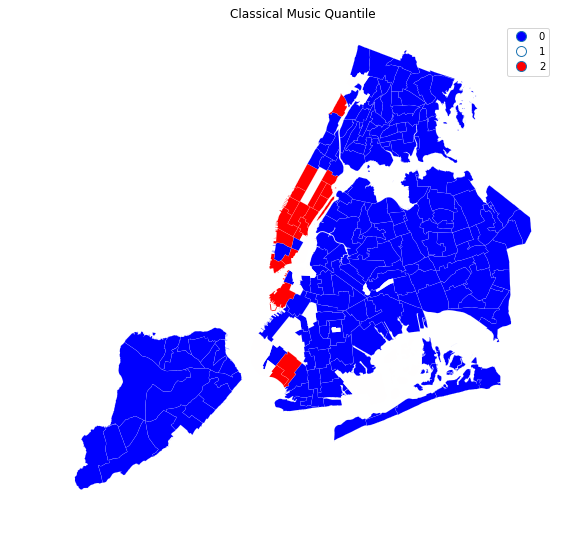

In [115]:
f, ax = plt.subplots(figsize=(9, 9))
NYN_merged.assign(cl=CLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='bwr', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Classical Music Quantile")

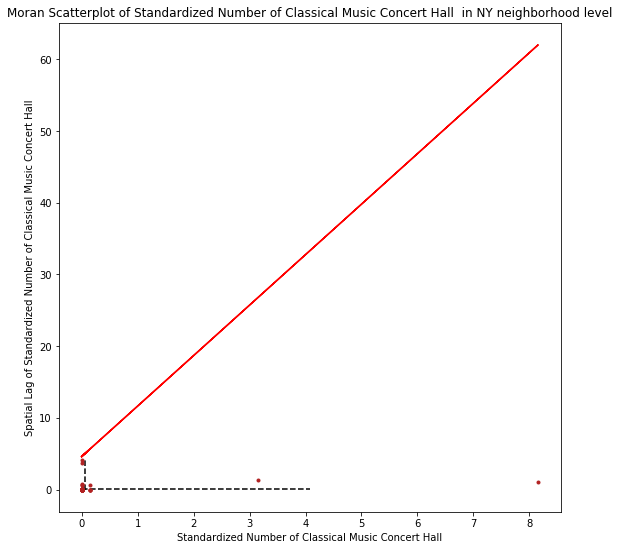

In [116]:
b,a = np.polyfit(C, GLag, 1)

f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(C, CLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(C.mean(), CLag.min(), CLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(CLag.mean(), CLag.min(), CLag.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(C, a + b * C, 'r')
plt.title('Moran Scatterplot of Standardized Number of Classical Music Concert Hall  in NY neighborhood level')
plt.ylabel('Spatial Lag of Standardized Number of Classical Music Concert Hall')
plt.xlabel('Standardized Number of Classical Music Concert Hall')

In [117]:
I_C = ps.Moran(C, w)
I_C.I, I_C.p_sim

(0.16063043724939491, 0.0040000000000000001)

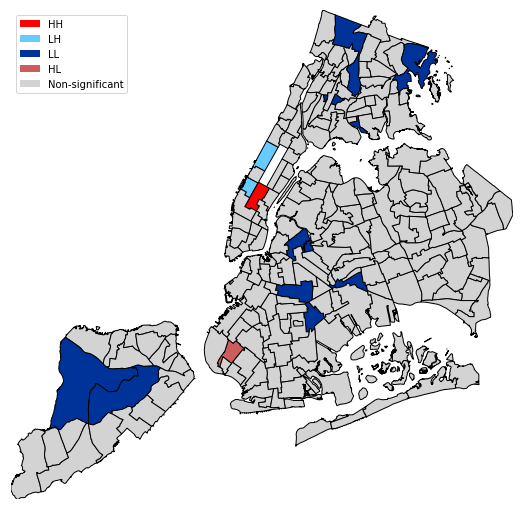

In [118]:
C = np.array(C)
Local_C = ps.Moran_Local(C, w, permutations=99999)
_ = maps.plot_lisa_cluster(shp_link, Local_C, figsize=(9, 9), leg_loc=2)

#### Weight by inversed of percentage of each entertainment

In [119]:
TT = T_count.N_of_Theater.sum()

In [120]:
TG = galleries_count.N_Galleries.sum()

In [121]:
TC = C_count.N_Classical_Music_Place.sum()

In [122]:
Total = TT + TG + TC

In [210]:
Total

1050

In [123]:
 TW = 1.0 / (TT * 1.0 / Total)

In [124]:
GW =  1.0 / (TG* 1.0 / Total)

In [125]:
CW = 1.0 / (TC * 1.0 / Total)

#### Let's go back and multiply the original number by the weight and sum all of them. Lastly, standardized and compare to the income level neighbor hood 

In [126]:
T_count['T_weighted'] = T_count.N_of_Theater * TW

In [127]:
galleries_count['G_weighted'] = galleries_count.N_Galleries * GW

In [128]:
C_count['C_weighted'] = C_count.N_Classical_Music_Place * CW

In [149]:
NYN_merged.merged(T_count,)

NTACode  N_of_Theater  Std_Theater  T_weighted
0     MN17            46    45.415382  420.000000
1     MN15            15    14.415382  136.956522
2     MN23            15    14.415382  136.956522
3     MN22             9     8.415382   82.173913
4     MN24             8     7.415382   73.043478
5     MN21             5     4.415382   45.652174
6     MN13             3     2.415382   27.391304
7     MN12             2     1.415382   18.260870
8     MN14             2     1.415382   18.260870
9     MN40             2     1.415382   18.260870
10    MN28             1     0.415382    9.130435
11    QN31             1     0.415382    9.130435
12    MN09             1     0.415382    9.130435
13    MN27             1     0.415382    9.130435
14    MN25             1     0.415382    9.130435
15    MN11             1     0.415382    9.130435
16    QN99             1     0.415382    9.130435
17    MN19             1     0.415382    9.130435

In [153]:
NYN_weighted = NYN_merged.merge(C_count, left_on = 'NTACode', 
                                         right_on = 'NTACode' , how = 'outer' )

In [158]:
NYN_weighted = NYN_weighted.merge(galleries_count, left_on = 'NTACode',
                                     right_on = 'NTACode', how = 'outer')

In [159]:
NYN_weighted = NYN_weighted.merge(T_count, left_on = 'NTACode', 
                                  right_on = "NTACode", how = 'outer')

In [184]:
NYN_weighted = NYN_weighted.iloc[:,[3,4,5,6,7,12,13,14,17,20,23]]

In [186]:
NYN_weighted.head()

NTACode        NTAName    Shape_Leng    Shape_Area  \
0    BK88   Borough Park  39247.228028  5.400502e+07   
1    QN52  East Flushing  25843.364936  2.945438e+07   
2    QN48     Auburndale  32446.878673  3.416422e+07   
3    QN51    Murray Hill  33266.904811  5.248828e+07   
4    QN27  East Elmhurst  19816.712323  1.972685e+07   

                                            geometry             TH  \
0  POLYGON ((990897.9000244141 169268.1207885742,...   28857.142857   
1  POLYGON ((1041061.948242188 215429.4609985352,...  116800.000000   
2  POLYGON ((1046392.971191406 210169.7536010742,...  135500.428571   
3  POLYGON ((1038593.459228516 221913.3550415039,...  111961.538462   
4  POLYGON ((1022728.275024414 217530.8082275391,...   36375.000000   

   Median_Income  Median_Income_std  C_weighted  G_weighted  T_weighted  
0   39765.750000          -0.860146         NaN    1.145038         NaN  
1   53511.666667          -0.336489         NaN         NaN         NaN  
2   78223.857143           0.604933         NaN         NaN         NaN  
3   60080.000000          -0.086266         NaN         NaN         NaN  
4   49822.375000          -0.477035         NaN    1.145038         NaN

In [187]:
NYN_weighted['C_weighted'].fillna(0, inplace=True)
NYN_weighted['G_weighted'].fillna(0, inplace=True)
NYN_weighted['T_weighted'].fillna(0, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [189]:
NYN_weighted['Total'] = NYN_weighted['C_weighted'] + NYN_weighted['G_weighted'] + NYN_weighted['T_weighted']

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Standardized the Total Numbers

In [194]:
Tm = NYN_weighted['Total'].mean()
Tstd = NYN_weighted['Total'].std()
NYN_weighted['Std_Total'] =( NYN_weighted['Total'] - Tm ) / Tstd 

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


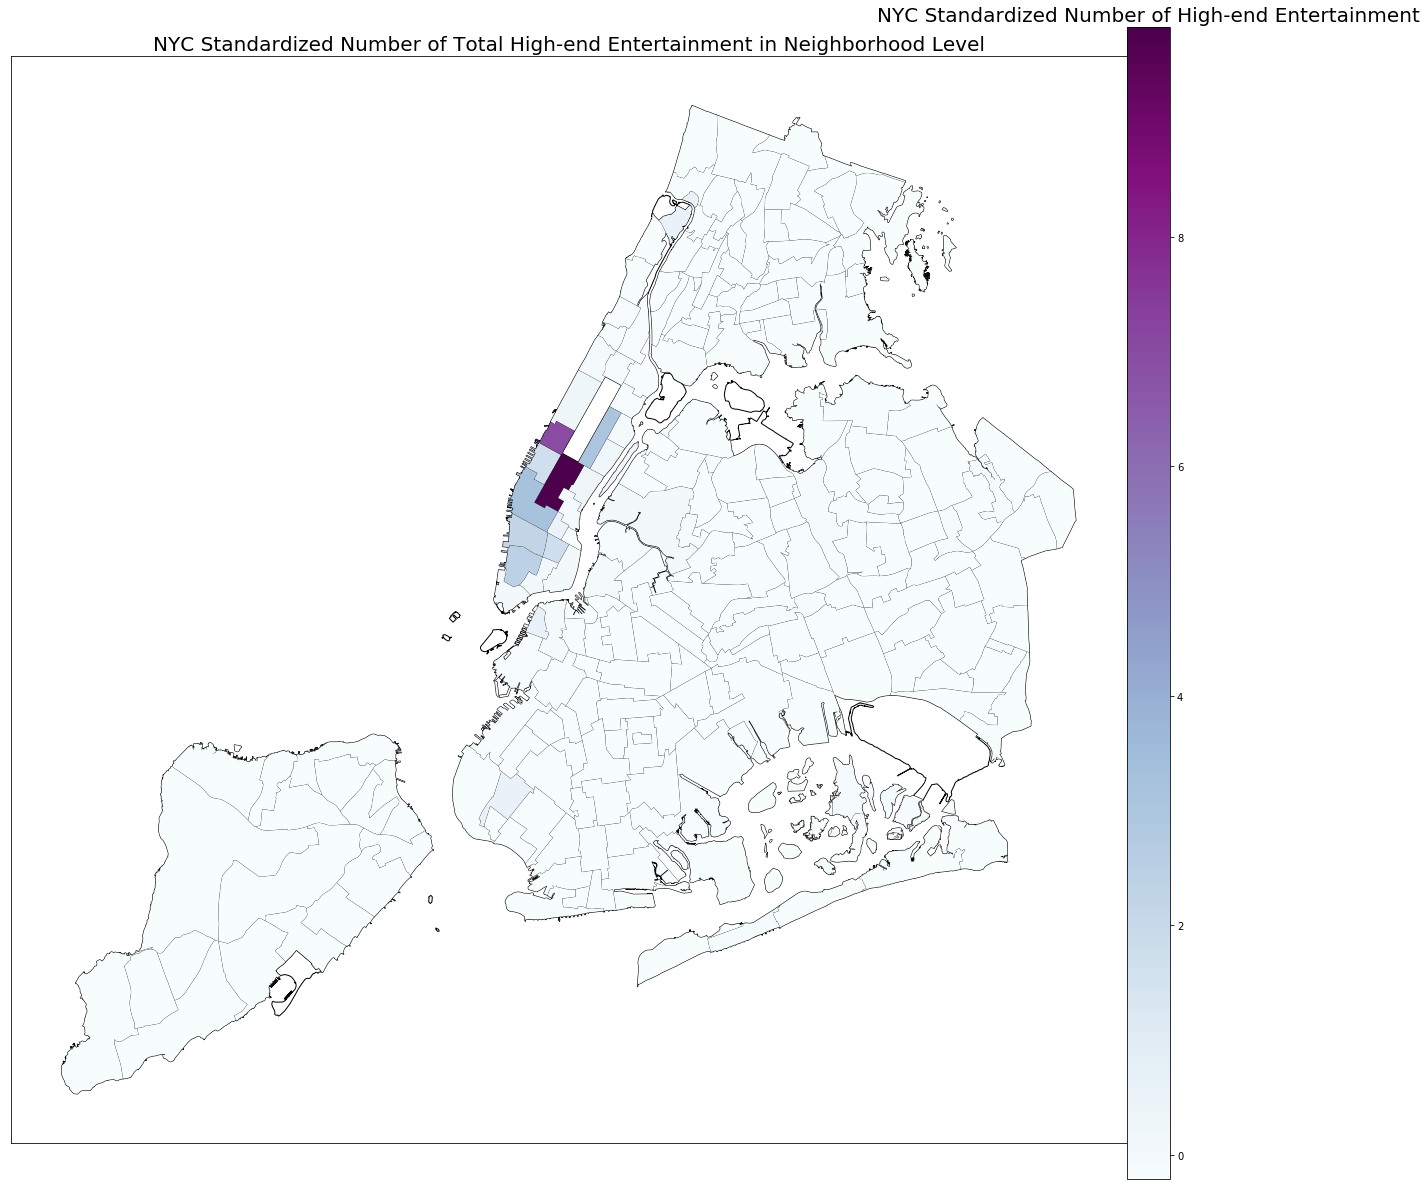

In [195]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
vmin, vmax = min(NYN_weighted['Std_Total']) , max(NYN_weighted['Std_Total'])

base = nynta.plot( color = 'white', edgecolor='black' ,ax = ax)
NYN_weighted.plot(column = 'Std_Total', cmap='BuPu',vmin = vmin, 
                       vmax = vmax ,edgecolor='black', linewidth = 0.1 ,ax =ax)
plt.title('NYC Standardized Number of Total High-end Entertainment in Neighborhood Level', fontsize = 20)
# adding heat map
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable...
sm._A = []
fig.colorbar(sm, cax=cax)

plt.title('NYC Standardized Number of High-end Entertainment', fontsize = 20)

In [203]:
NYNw = NYN_weighted['Total']

In [204]:
I_NYNw = ps.Moran(NYNw, w)
I_NYNw.I, I_NYNw.p_sim

(0.51908848394370355, 0.001)

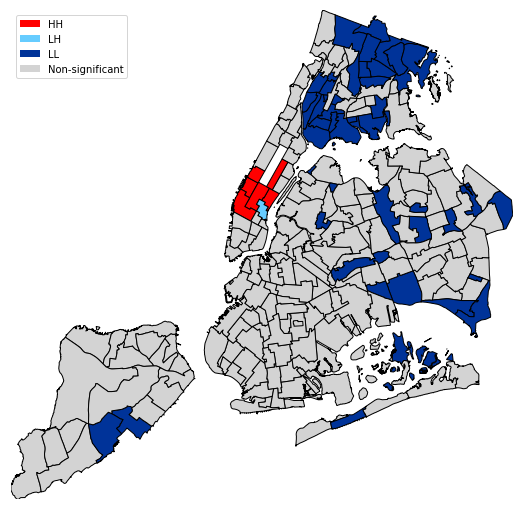

In [206]:
aNYNw = np.array(NYNw)

Local_NYNw = ps.Moran_Local(aNYNw, w, permutations=99999)

_ = maps.plot_lisa_cluster(shp_link, Local_NYNw, figsize=(9, 9), leg_loc=2)

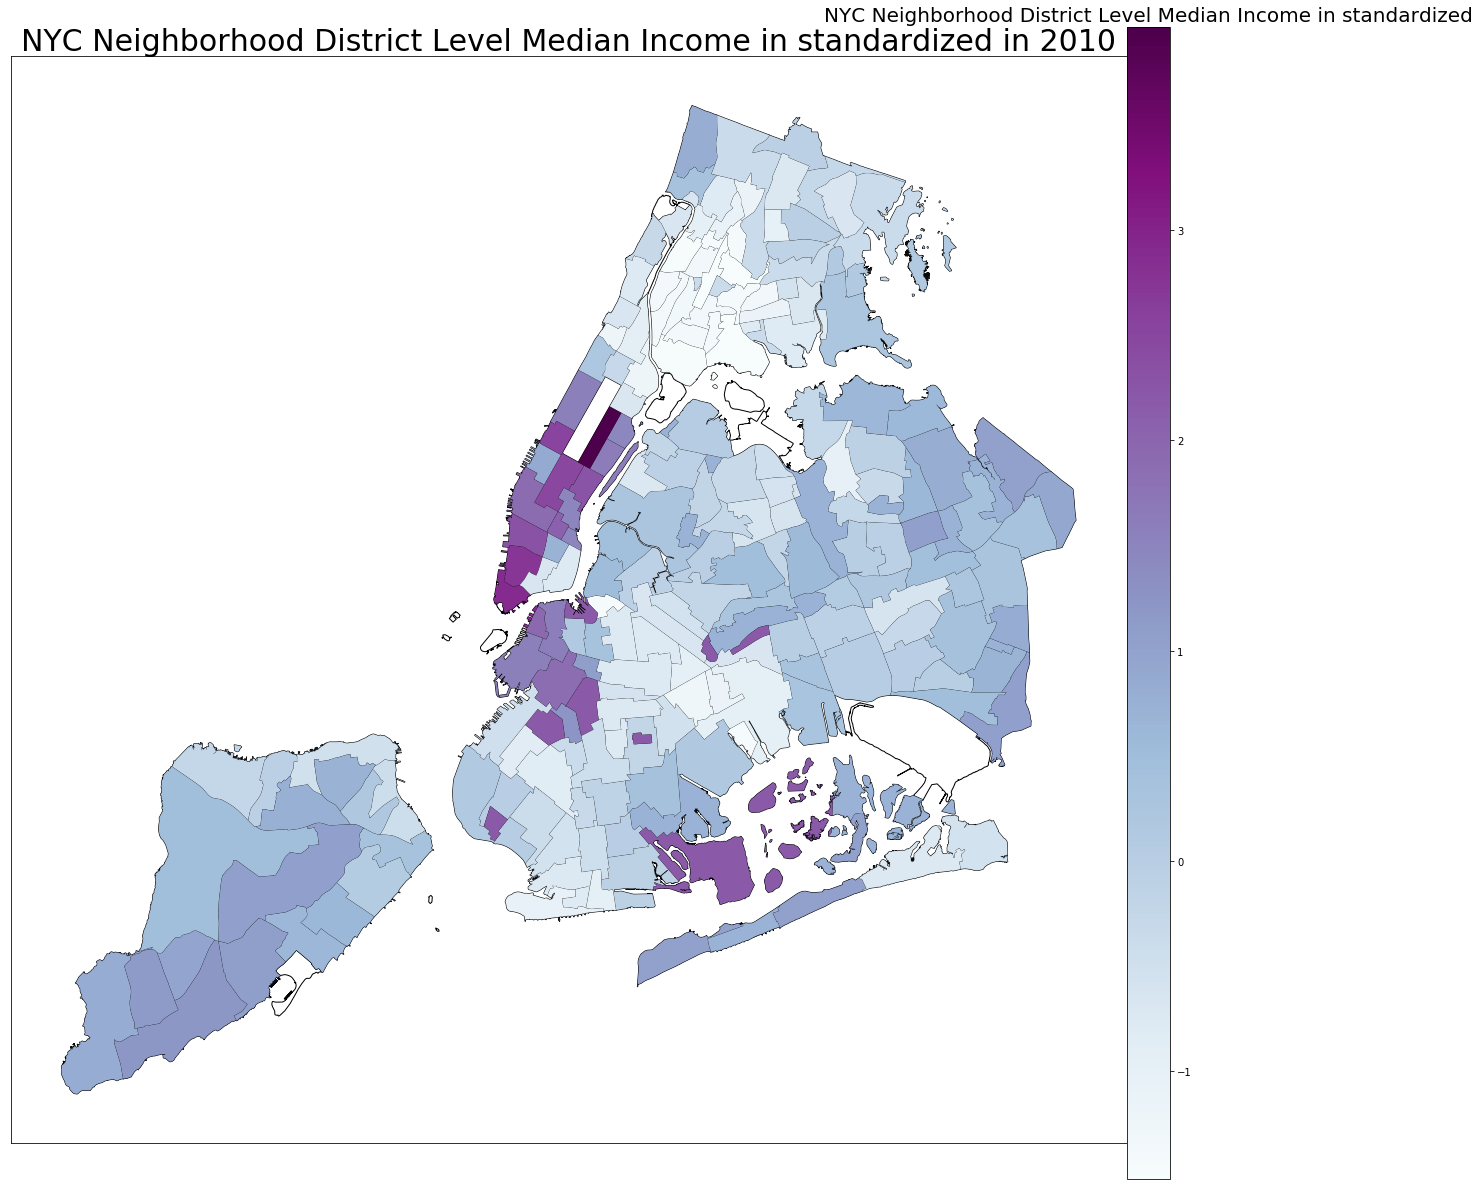

In [197]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
vmin, vmax = min(NYN_merged['Median_Income_std']) , max(NYN_merged['Median_Income_std'])

base = nynta.plot( color = 'white', edgecolor='black' ,ax = ax)
NYN_merged.plot(column = 'Median_Income_std', cmap='BuPu',vmin = vmin, 
                vmax = vmax ,edgecolor='black', linewidth = 0.1 ,ax =ax)
plt.title('NYC Neighborhood District Level Median Income in standardized in 2010', fontsize = 30)
# adding heat map
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable...
sm._A = []
fig.colorbar(sm, cax=cax)

plt.title('NYC Neighborhood District Level Median Income in standardized', fontsize = 20)